In [1]:
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, LeavePOut
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, LeaveOneOut, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE, ADASYN

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy.stats import zscore
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


### Steps and tasks: [ Total Score: 60 points]

1. Import and understand the data. [5 Marks]

A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [2]:
df_signal_data = pd.read_csv('signal-data.csv')

In [3]:
df_signal_data.shape

(1567, 592)

In [4]:
df_signal_data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [5]:
df_signal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
df_signal_data.count()

Time         1567
0            1561
1            1560
2            1553
3            1553
             ... 
586          1566
587          1566
588          1566
589          1566
Pass/Fail    1567
Length: 592, dtype: int64

In [7]:
df_signal_data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [8]:
df_signal_data.nunique()

Time         1534
0            1520
1            1504
2             507
3             518
             ... 
586           322
587           260
588           120
589           611
Pass/Fail       2
Length: 592, dtype: int64

In [9]:
df_signal_data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

-----------------------------------------------------------------------------------------------------------------------------

B. Print 5 point summary and share at least 2 observations. [3 Marks]

Descriptive Statistics involves understanding the distribution and nature of the data. Five number summary is a part of descriptive statistics and consists of five values and all these values will help us to describe the data.

- The minimum value (the lowest value)
- 25th Percentile or Q1
- 50th Percentile or Q2 or Median
- 75th Percentile or Q3
- Maximum Value (the highest value)

In [10]:
df_signal_data.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

Observations:
    
    - Data contains 591 columns and total of 1567 records
    - The 0th column contains 1561 records, 2966 25th percentile (Q1), 3011 50th percentile (Q2), 3356 75th percentile (Q3), 2743 minimum and 3356 maximum, 3014 mean and 73 standard deviation.

-----------------------------------------------------------------------------------------------------------------------------

2. Data cleansing: [15 Marks]

A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

In [11]:
# Below code gives percentage of null in every column
null_percentage = df_signal_data.isnull().sum() / df_signal_data.shape[0] * 100
print(null_percentage)

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64


In [12]:
# Below code gives list of columns having more than 20% null
columns_to_drop = null_percentage[null_percentage > 0.20].keys()
print(columns_to_drop)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '19', '40',
       ...
       '564', '565', '566', '567', '568', '569', '578', '579', '580', '581'],
      dtype='object', length=338)


In [13]:
for column in df_signal_data.select_dtypes([np.number]).columns:  # Loop through columns
    null_percentage = df_signal_data[column].isnull().sum() / len(df_signal_data)
    null_percentage = null_percentage * 100
    
    if null_percentage > 0.20:
        df_signal_data.drop([column], axis = 1, inplace = True) # drop this column if missing value percentage is more than 20%
    else:
        mean = df_signal_data[column].mean()
        df_signal_data[column] = df_signal_data[column].fillna(mean) # impute missing values with mean of the column if missing value percentage is less than 20%

In [14]:
df_signal_data.columns

Index(['Time', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=254)

In [15]:
# Below code gives percentage of null in every column
null_percentage = df_signal_data.isnull().sum() / df_signal_data.shape[0] * 100
print(null_percentage)

Time         0.0
8            0.0
9            0.0
10           0.0
11           0.0
            ... 
586          0.0
587          0.0
588          0.0
589          0.0
Pass/Fail    0.0
Length: 254, dtype: float64


-----------------------------------------------------------------------------------------------------------------------------

B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [16]:
nunique = df_signal_data.nunique()
cols_to_drop = nunique[nunique == 1].index
print('Columns which are unique and to drop: ', cols_to_drop)

Columns which are unique and to drop:  Index(['13', '42', '49', '52', '149', '179', '186', '189', '284', '315', '322',
       '325', '422', '451', '458', '461'],
      dtype='object')


In [17]:
df_signal_data.drop(cols_to_drop, axis = 1, inplace = True)

In [18]:
nunique = df_signal_data.nunique()
cols_to_drop = nunique[nunique == 1].index
print('Columns which are unique and to drop: ', cols_to_drop)

Columns which are unique and to drop:  Index([], dtype='object')


-----------------------------------------------------------------------------------------------------------------------------

C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [19]:
df_signal_data.isnull().any().any()

False

In [20]:
# Checking for distribution of the target class shows that the data set is highly imbalanced
df_signal_data['Pass/Fail'].value_counts(normalize = True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [21]:
# label encoding the target class
# df_signal_data['Pass/Fail'] = df_signal_data['Pass/Fail'].replace([-1, 1], [0, 1])

In [22]:
# Making a copy of the dataset and dropping the target class
df_signal_data_copy = df_signal_data.copy()
df_signal_data_copy.drop(['Pass/Fail'], axis = 1)

Time         8         9        10        11          12  \
0     2008-07-19 11:55:00  1.500500  0.016200 -0.003400  0.945500  202.439600   
1     2008-07-19 12:32:00  1.496600 -0.000500 -0.014800  0.962700  200.547000   
2     2008-07-19 13:17:00  1.443600  0.004100  0.001300  0.961500  202.017900   
3     2008-07-19 14:43:00  1.488200 -0.012400 -0.003300  0.962900  201.848200   
4     2008-07-19 15:22:00  1.503100 -0.003100 -0.007200  0.956900  201.942400   
...                   ...       ...       ...       ...       ...         ...   
1562  2008-10-16 15:13:00  1.342400 -0.004500 -0.005700  0.957900  203.986700   
1563  2008-10-16 20:49:00  1.433300 -0.006100 -0.009300  0.961800  204.017300   
1564  2008-10-17 05:26:00  1.462862 -0.000841  0.000146  0.964353  199.956809   
1565  2008-10-17 06:01:00  1.462200 -0.007200  0.003200  0.969400  197.244800   
1566  2008-10-17 06:07:00  1.462862 -0.000841  0.000146  0.964353  199.956809   

             14          15         16        17  ...     576      577  \
0      7.955800  414.871000  10.043300  0.968000  ...  1.6765  14.9509   
1     10.154800  414.734700   9.259900  0.970100  ...  1.1065  10.9003   
2      9.515700  416.707500   9.314400  0.967400  ...  2.0952   9.2721   
3      9.605200  422.289400   9.692400  0.968700  ...  1.7585   8.5831   
4     10.566100  420.592500  10.338700  0.973500  ...  1.6597  10.9698   
...         ...         ...        ...       ...  ...     ...      ...   
1562  11.769200  419.340400  10.239700  0.969300  ...  1.4879  11.7256   
1563   9.162000  405.817800  10.228500  0.969600  ...  1.0187  17.8379   
1564   9.005371  413.086035   9.907603  0.971444  ...  1.2237  17.7267   
1565   9.735400  401.915300   9.863000  0.974000  ...  1.7085  19.2104   
1566   9.005371  413.086035   9.907603  0.971444  ...  1.2878  22.9183   

         582     583     584      585       586       587       588  \
0     0.5005  0.0118  0.0035   2.3630  0.021458  0.016475  0.005283   
1     0.5019  0.0223  0.0055   4.4447  0.009600  0.020100  0.006000   
2     0.4958  0.0157  0.0039   3.1745  0.058400  0.048400  0.014800   
3     0.4990  0.0103  0.0025   2.0544  0.020200  0.014900  0.004400   
4     0.4800  0.4766  0.1045  99.3032  0.020200  0.014900  0.004400   
...      ...     ...     ...      ...       ...       ...       ...   
1562  0.4988  0.0143  0.0039   2.8669  0.006800  0.013800  0.004700   
1563  0.4975  0.0131  0.0036   2.6238  0.006800  0.013800  0.004700   
1564  0.4987  0.0153  0.0041   3.0590  0.019700  0.008600  0.002500   
1565  0.5004  0.0178  0.0038   3.5662  0.026200  0.024500  0.007500   
1566  0.4987  0.0181  0.0040   3.6275  0.011700  0.016200  0.004500   

             589  
0      99.670066  
1     208.204500  
2      82.860200  
3      73.843200  
4      73.843200  
...          ...  
1562  203.172000  
1563  203.172000  
1564   43.523100  
1565   93.494100  
1566  137.784400  

[1567 rows x 237 columns]

In [23]:
# Create correlation matrix
corr_matrix = df_signal_data_copy.select_dtypes([np.number]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df_signal_data_copy.drop(to_drop, axis = 1, inplace=True)

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_10760\4237487680.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [24]:
row, column = df_signal_data_copy.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 107 columns


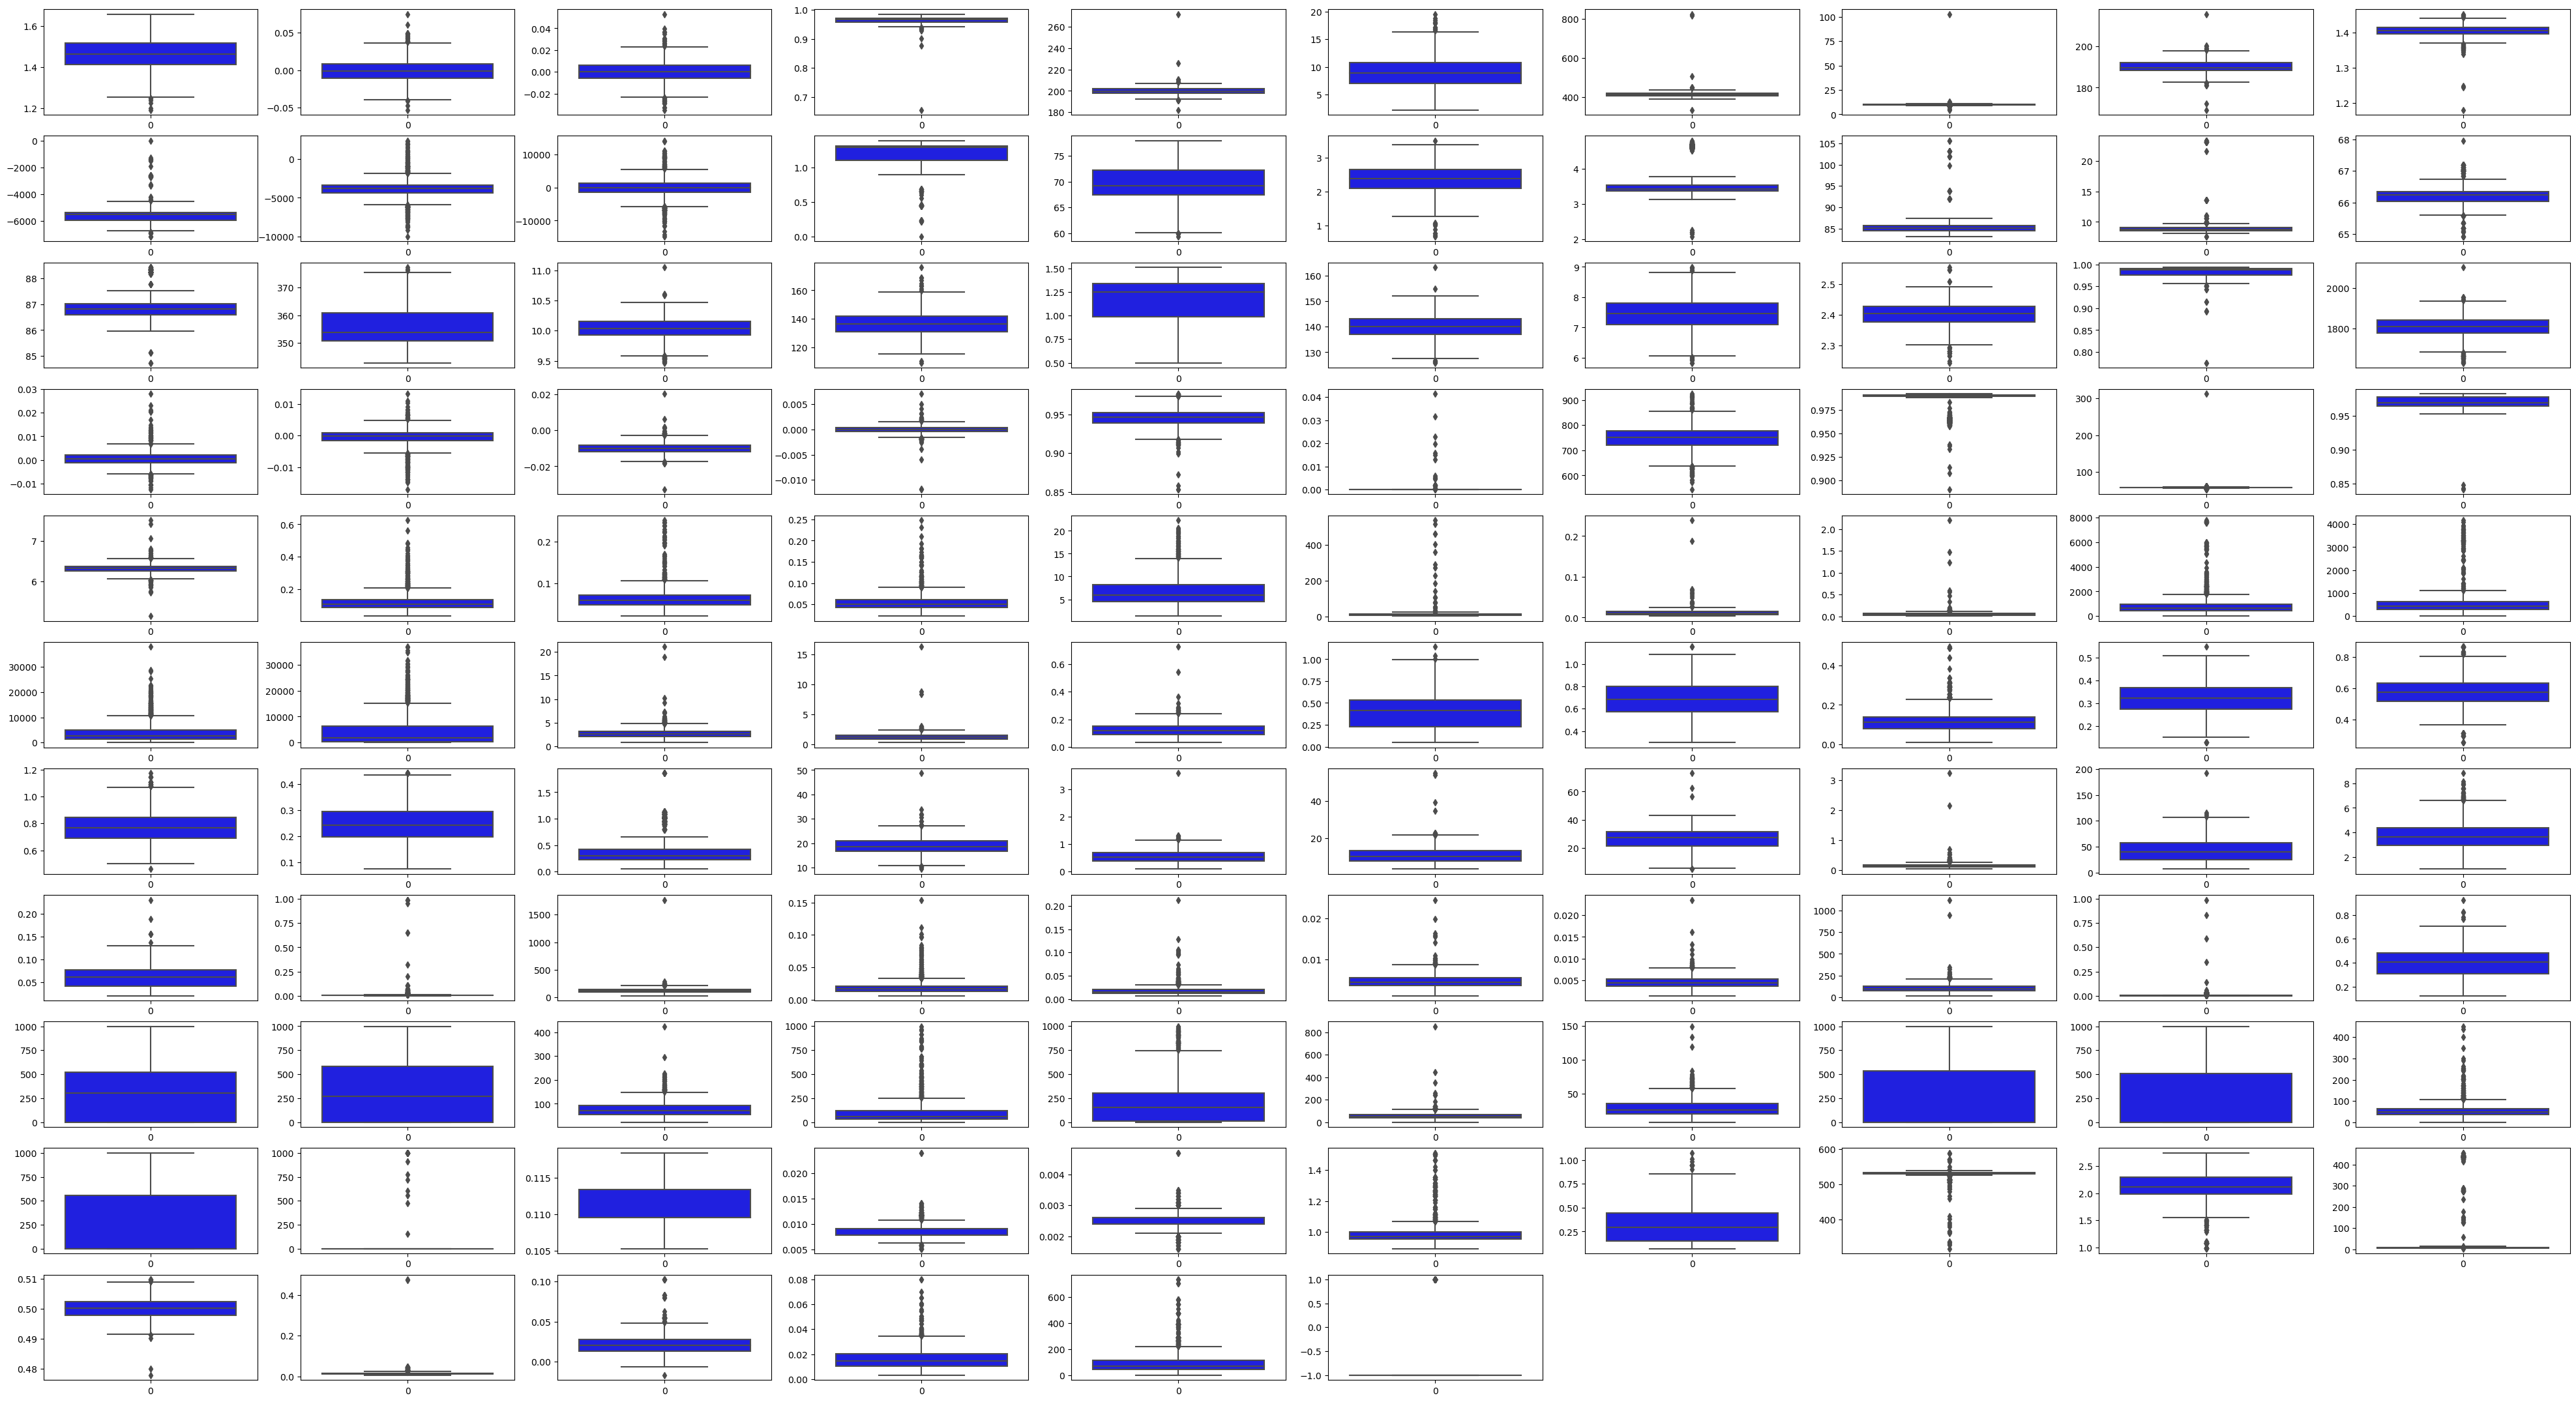

In [25]:
# Boxplot to check for outliers

plt.figure(figsize = (50, 50))
col = 1

for i in df_signal_data_copy.select_dtypes([np.number]).columns:
    plt.subplot(20, 10, col)
    sns.boxplot(df_signal_data_copy[i], color = 'blue')
    col += 1

In [26]:
# Find the outliers and replace them by median

for i in df_signal_data_copy.select_dtypes([np.number]).columns:
    q1 = df_signal_data_copy[i].quantile(0.25)
    q3 = df_signal_data_copy[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df_signal_data_copy.loc[(df_signal_data_copy[i] < low) | (df_signal_data_copy[i] > high), i] = df_signal_data_copy[i].median()

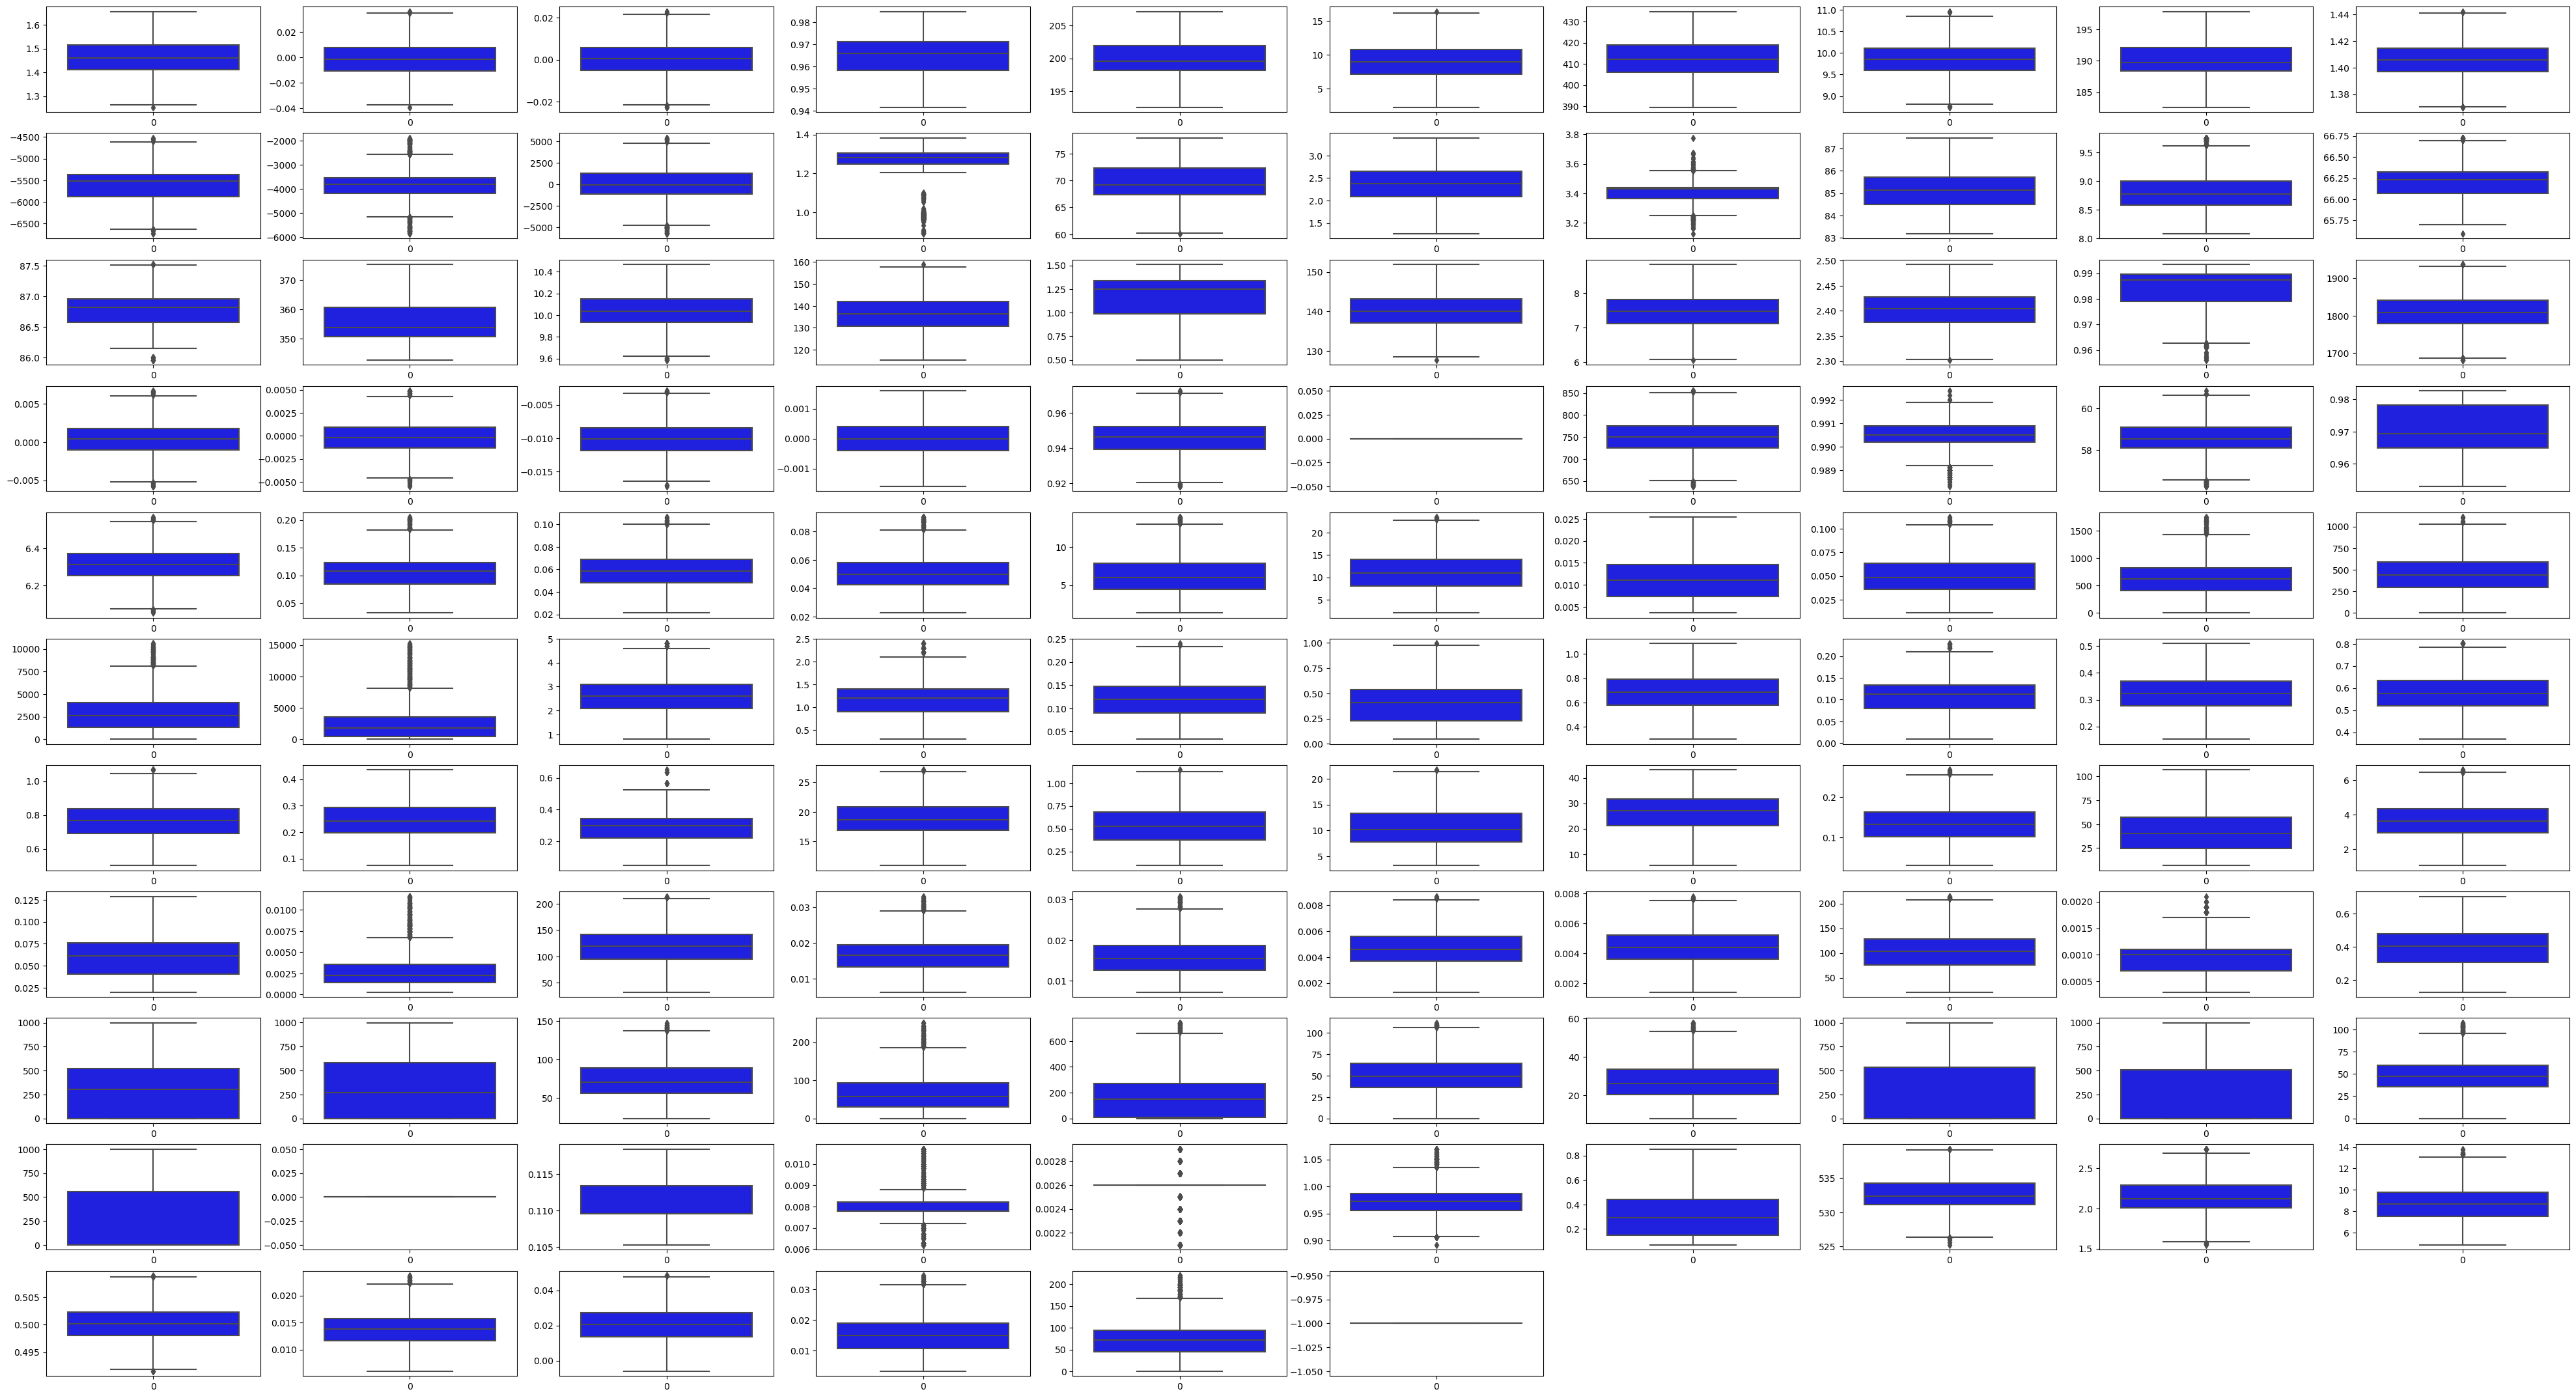

In [27]:
# After treating the outlier values
    
plt.figure(figsize = (50, 50))
col = 1

for i in df_signal_data_copy.select_dtypes([np.number]).columns:
    plt.subplot(20, 10, col)
    sns.boxplot(df_signal_data_copy[i], color = 'blue')
    col += 1

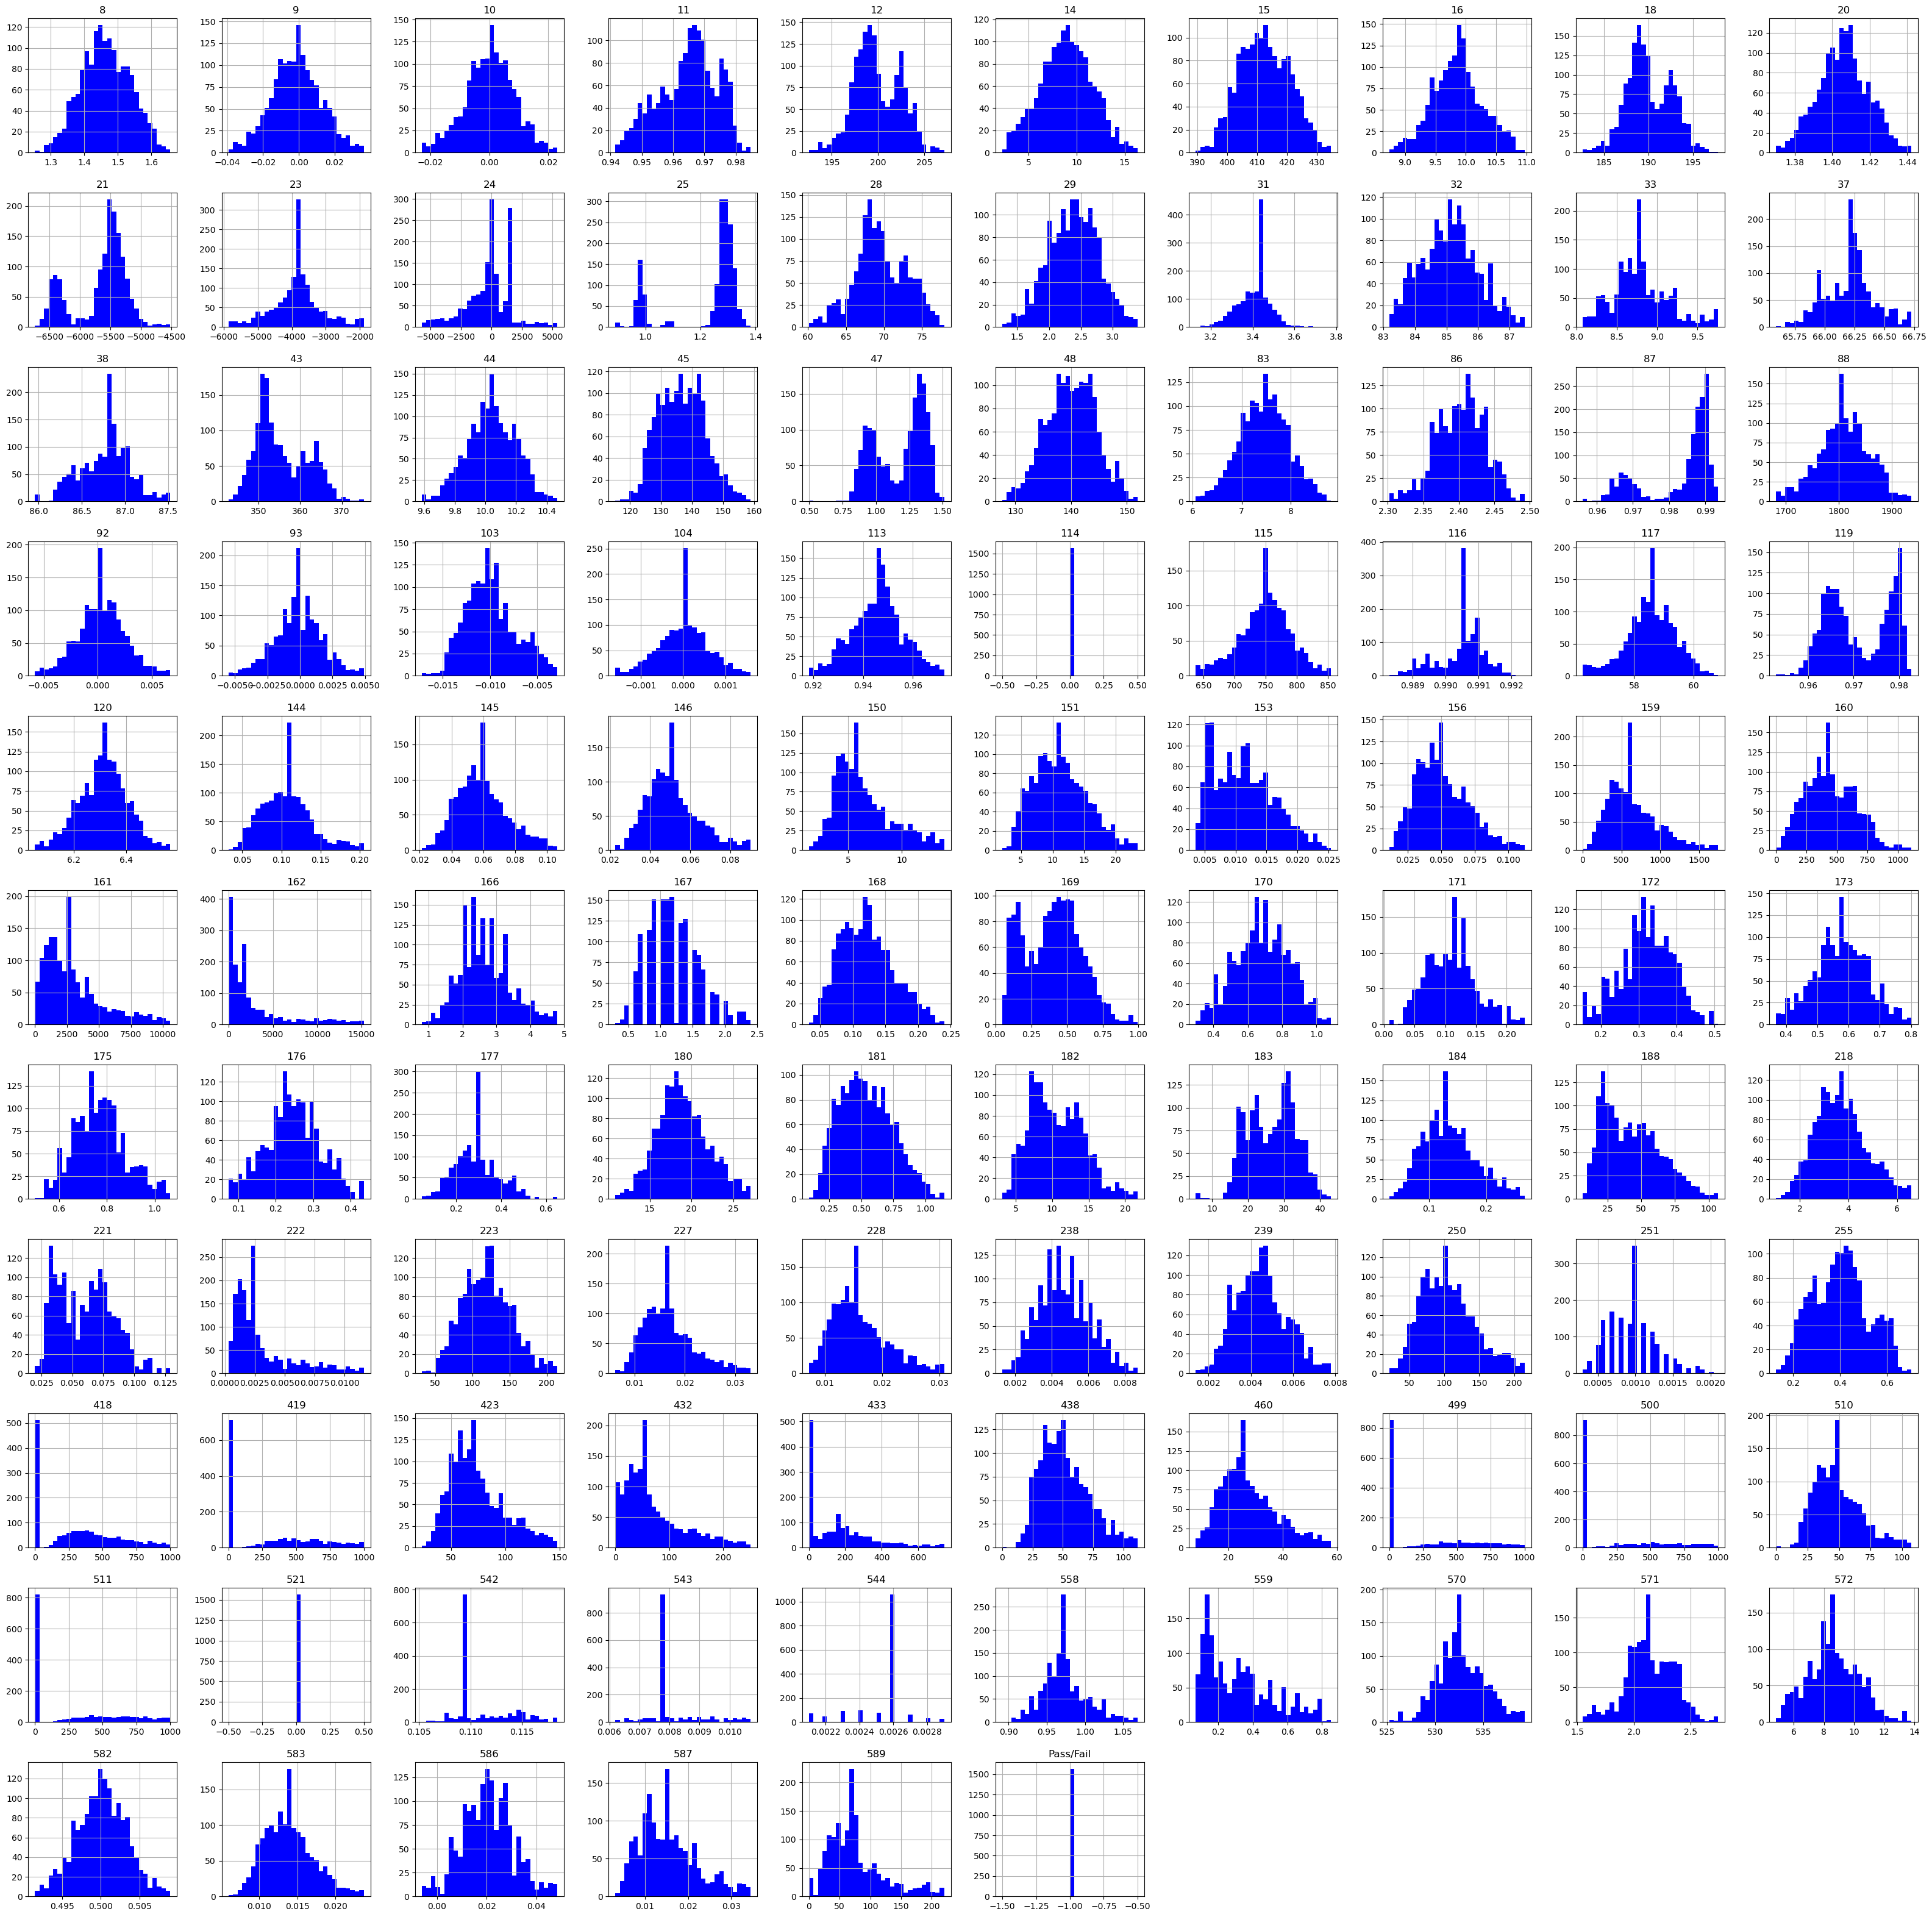

In [28]:
# Plotting histogram to check for the frequency of values within a variable

df_signal_data_copy.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

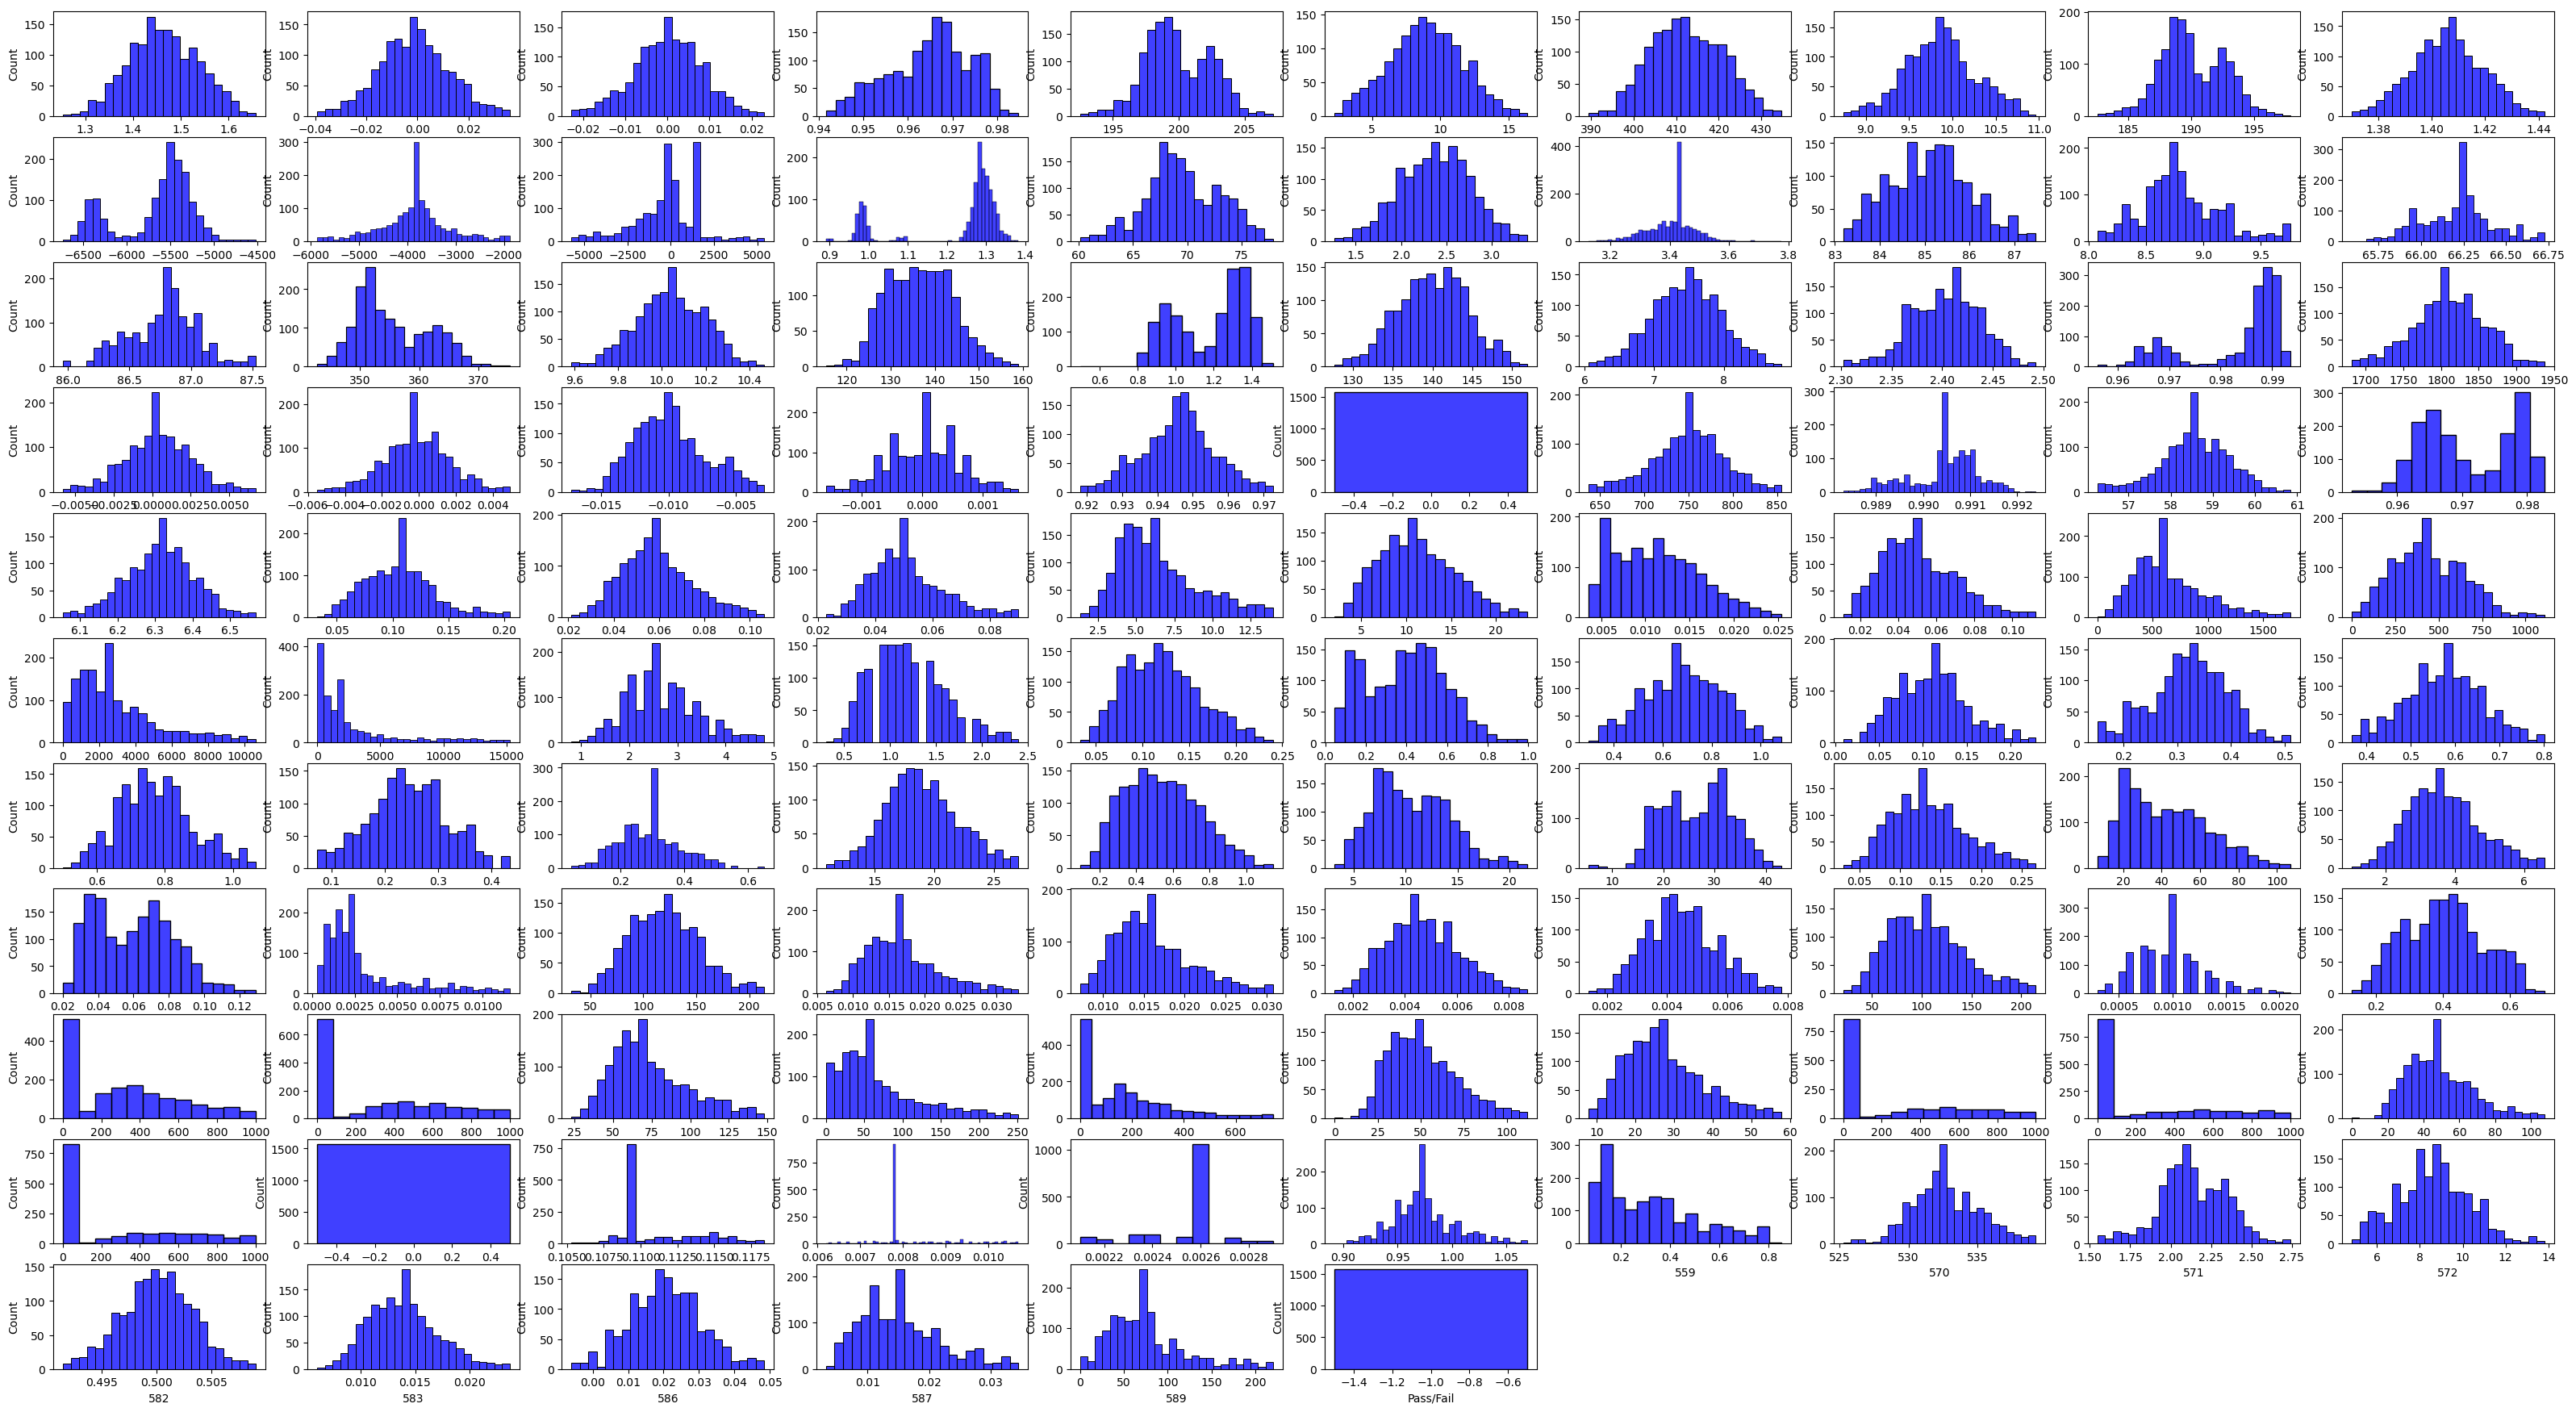

In [29]:
# Density plot to check for the distribution of the variables

plt.figure(figsize = (40, 40))
col = 1

for i in df_signal_data_copy.select_dtypes([np.number]).columns:
    plt.subplot(20, 10, col)
    sns.histplot(df_signal_data_copy[i], color = 'blue')
    col += 1 

-----------------------------------------------------------------------------------------------------------------------------

D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

In [30]:
# Calculate the correlation matrix

def calculate_correlation_matrix(df_signal_data, threshold):
    plt.figure(figsize = (20, 18))
    corr_matrix = df_signal_data.select_dtypes([np.number]).corr()
    sns.heatmap(abs(corr_matrix > 0.7), cmap = "Greens");

In [31]:
# Remove the highly collinear features from dataframe

def remove_collinear_features(df_signal_data, threshold):
    # Calculate the correlation matrix
    corr_matrix = df_signal_data.select_dtypes([np.number]).corr()
    iterations = range(len(corr_matrix.columns) - 1)
    drop_columns = []

    # Iterate through the correlation matrix and compare correlations
    for i in iterations:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_columns.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df_signal_data = df_signal_data.drop(columns = drops, axis = 1, inplace = True)

    return df_signal_data

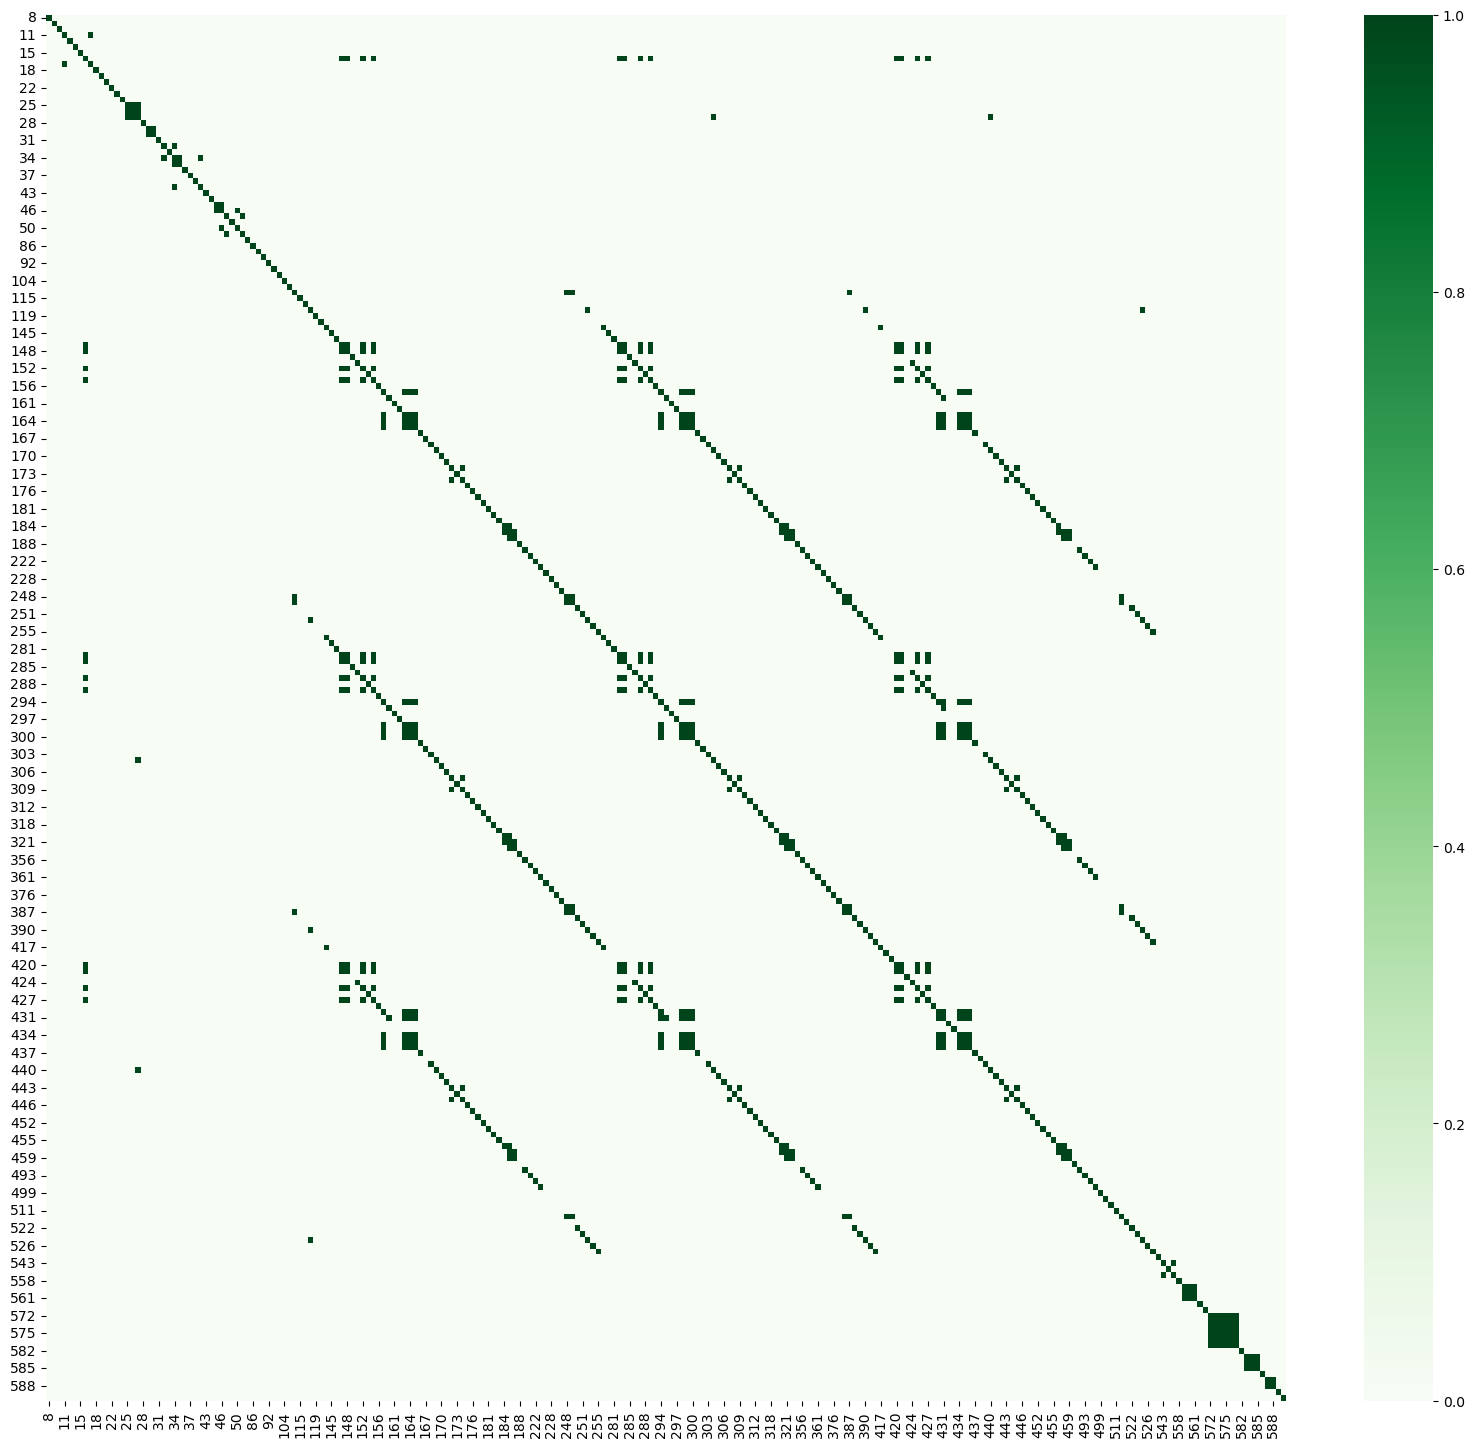

In [32]:
threshold = 0.70
calculate_correlation_matrix(df_signal_data, threshold)

In [33]:
# Remove columns having more than 70% correlation
# Both positive and negative correlations are considered here

threshold = 0.70
data = remove_collinear_features(df_signal_data, threshold)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0
185 | 184 | 0.71
187 | 185 | 0.83
248 | 114 | 0.7
249 | 114 | 0.98
249 | 248 | 0.73
252 | 117 | 0.99
254 | 119 | 0.8
279 | 144 | 0.98
280 | 145 | 0.96
281 | 146 | 0.95
282 | 16 | 0.88
282 | 147 | 1.0
282 | 148 | 0.89
282 | 152 | 0.89
282 | 154 | 0.8
283 | 16 | 0.97
283 | 147 | 0.89
283 | 148 | 1.0
283 | 152 | 0.99
283 | 154 | 0.94
283 | 282 | 0.89
285 | 150 | 0.97
286 | 151 | 0.99
287 | 16 | 0.98
287 | 147 | 0.9
287 | 148 | 0.99
287

NameError: name 'drop_cols' is not defined

-----------------------------------------------------------------------------------------------------------------------------

3. Data analysis & visualisation: [5 Marks]

A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

In [34]:
df_signal_data.skew()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_10760\2830632690.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_signal_data.skew()


8            -0.073824
9             0.331433
10            0.057724
11          -10.221613
12            7.209324
               ...    
586           1.438483
587           1.948028
588           2.030018
589           2.715340
Pass/Fail     3.487359
Length: 237, dtype: float64

In [35]:
# Create correlation matrix
corr_matrix = df_signal_data.select_dtypes([np.number]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df_signal_data.drop(to_drop, axis = 1, inplace=True)

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_10760\1222408100.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [36]:
row, column = df_signal_data.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 107 columns


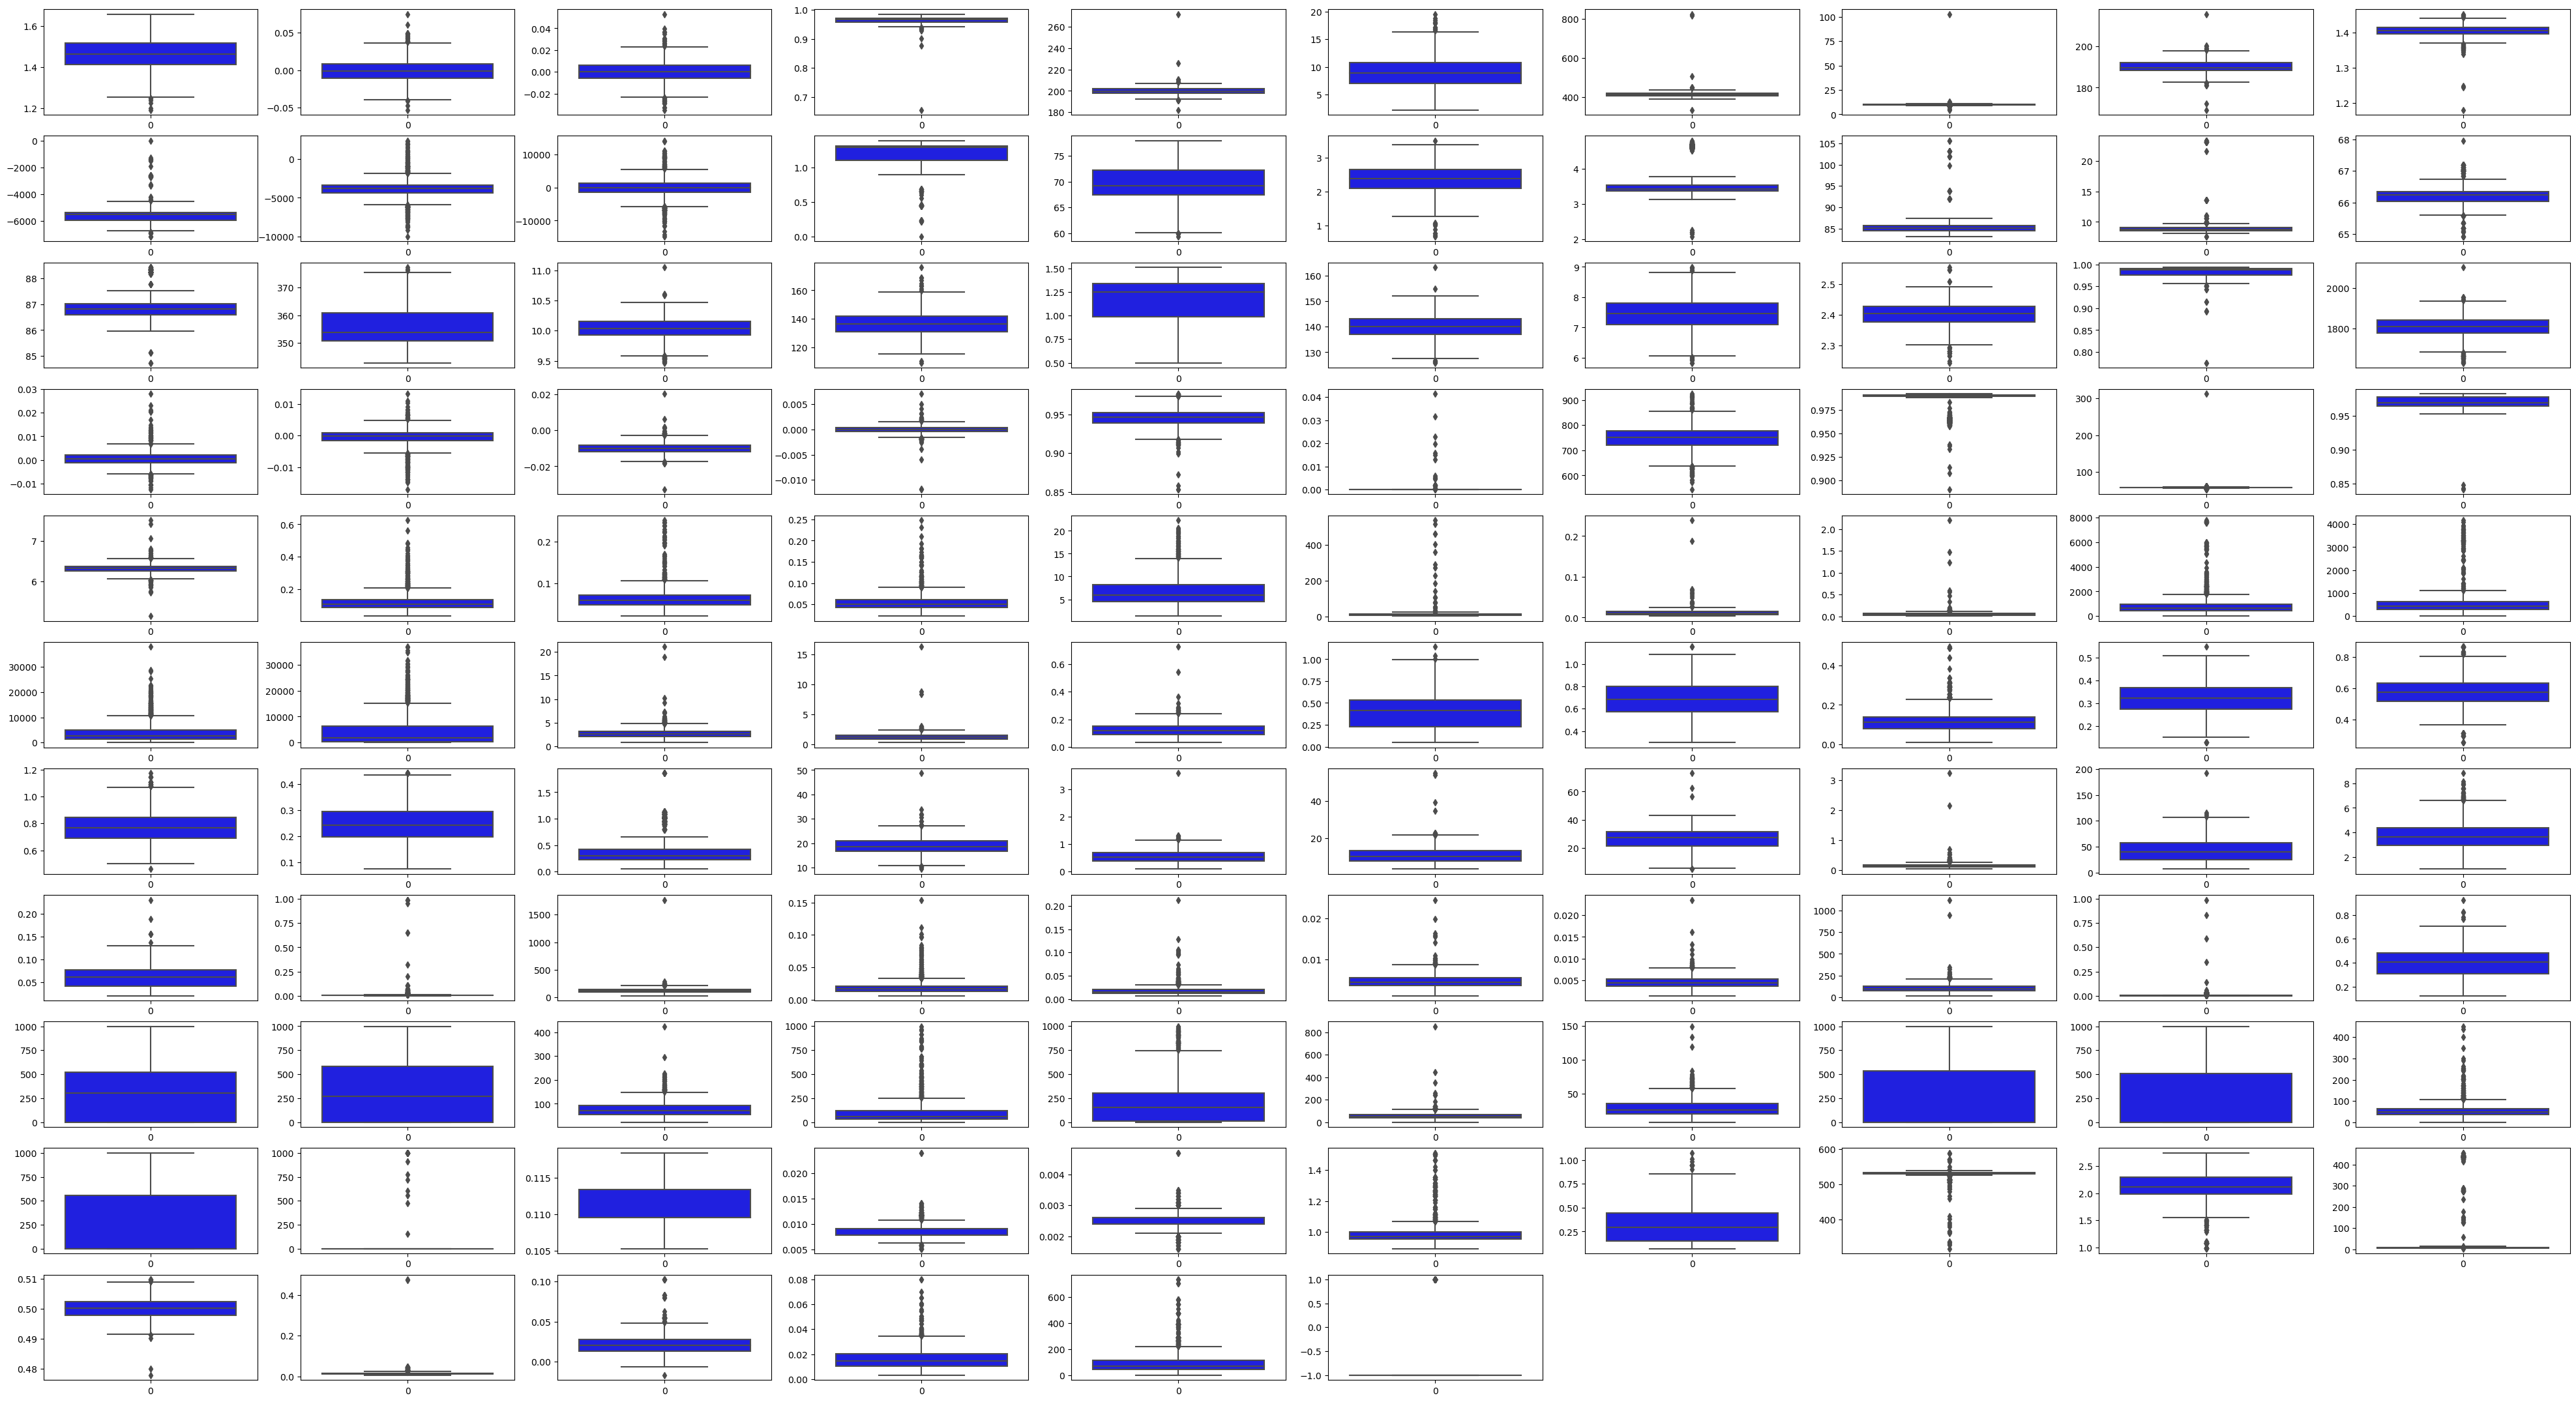

In [37]:
# Boxplot to check for outliers

plt.figure(figsize = (50, 50))
col = 1

for i in df_signal_data.select_dtypes([np.number]).columns:
    plt.subplot(20, 10, col)
    sns.boxplot(df_signal_data[i], color = 'blue')
    col += 1

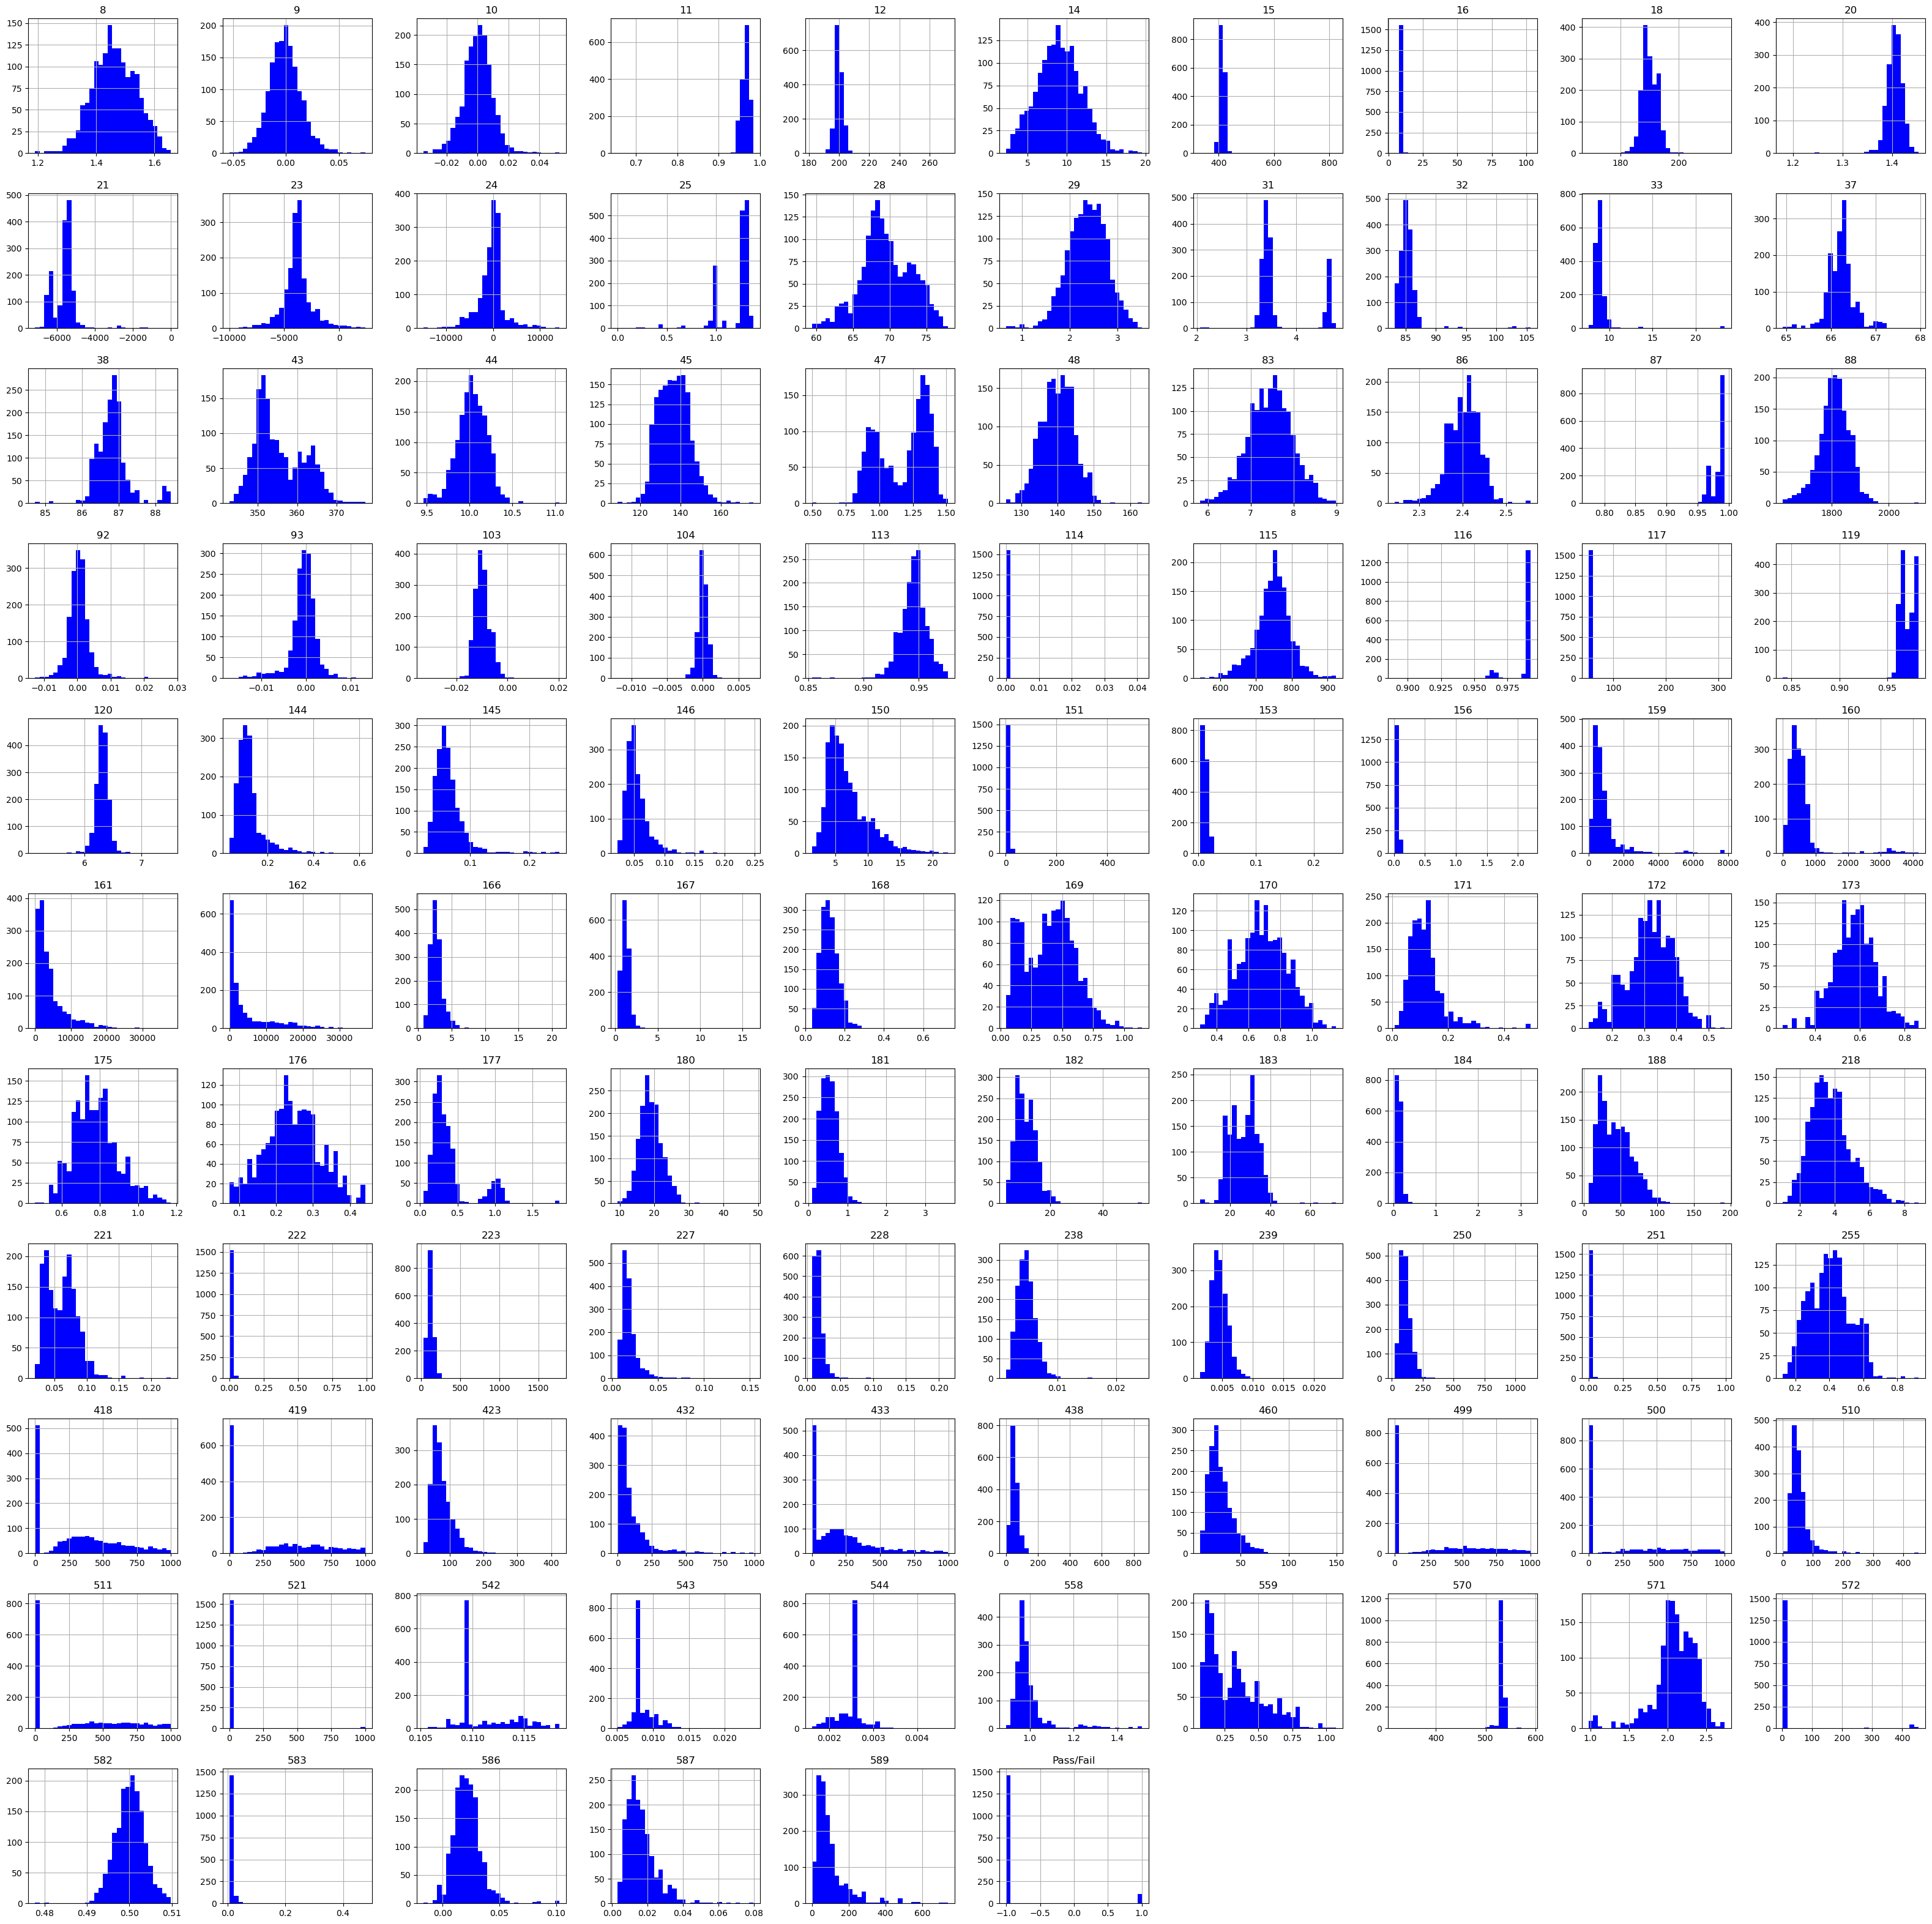

In [38]:
# Plotting histogram to check for the frequency of values within a variable

df_signal_data.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

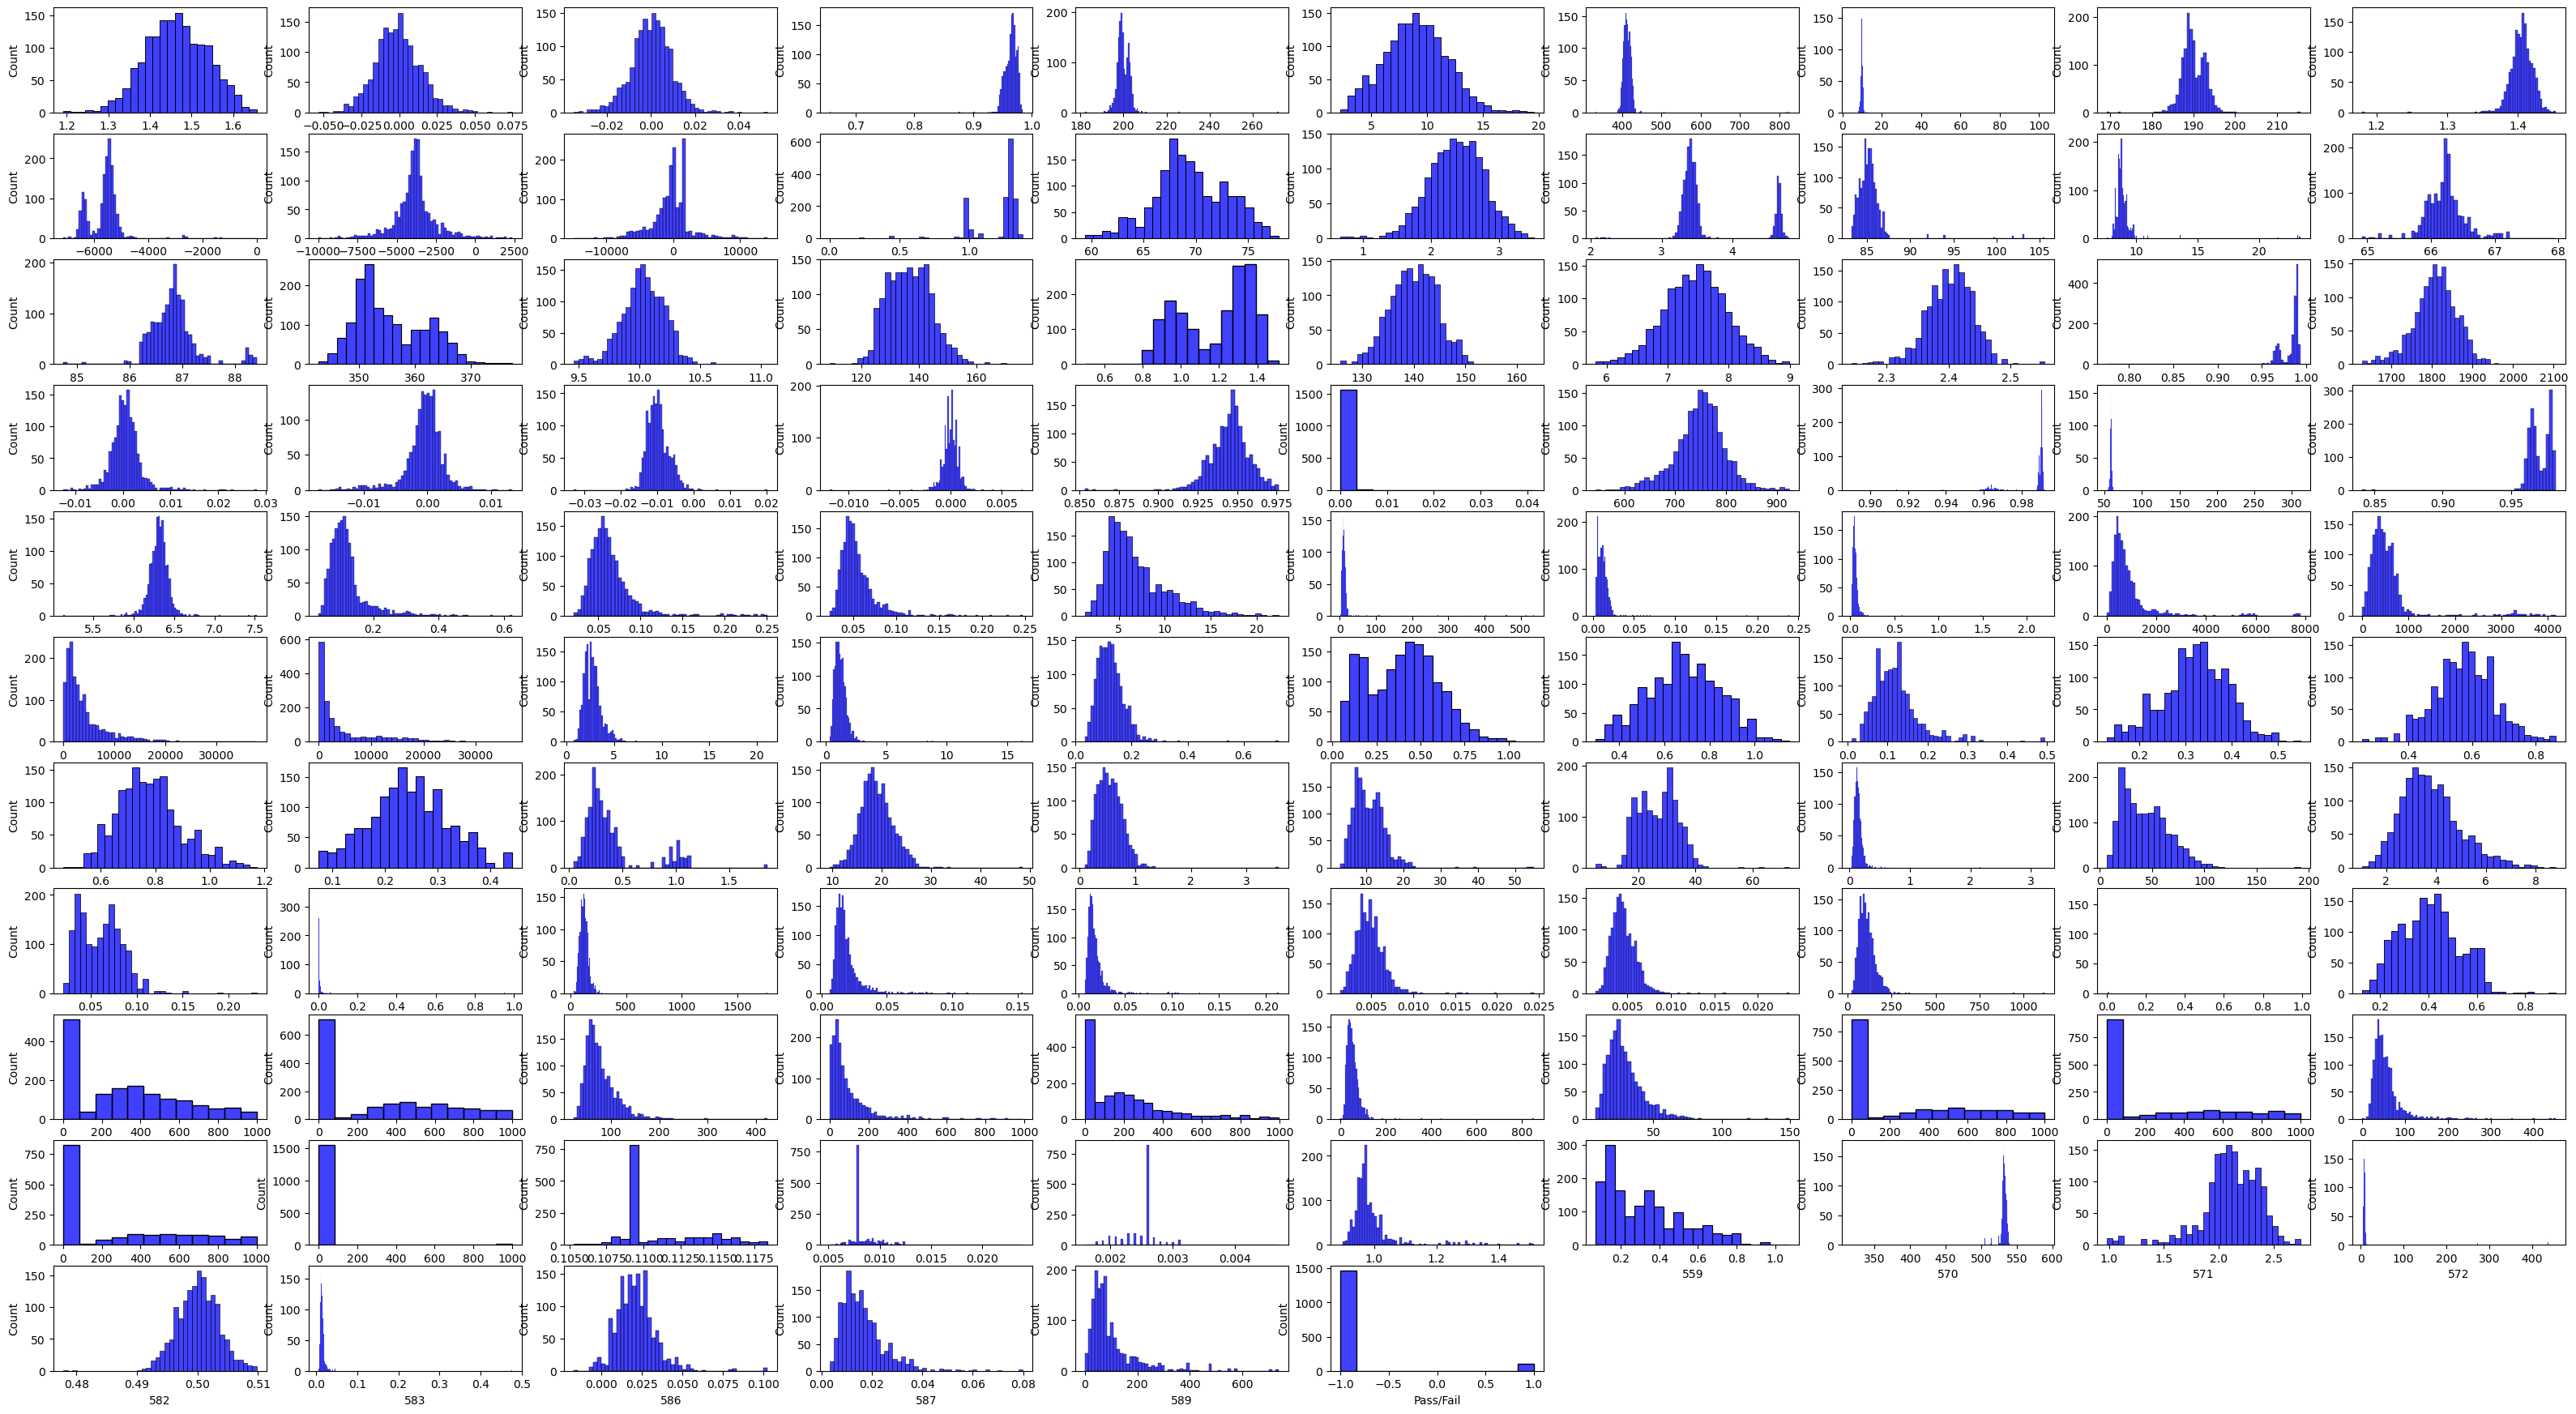

In [39]:
# Density plot to check for the distribution of the variables

plt.figure(figsize = (40, 40))
col = 1

for i in df_signal_data.select_dtypes([np.number]).columns:
    plt.subplot(20, 10, col)
    sns.histplot(df_signal_data[i], color = 'blue')
    col += 1

-----------------------------------------------------------------------------------------------------------------------------

B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_10760\1510467266.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


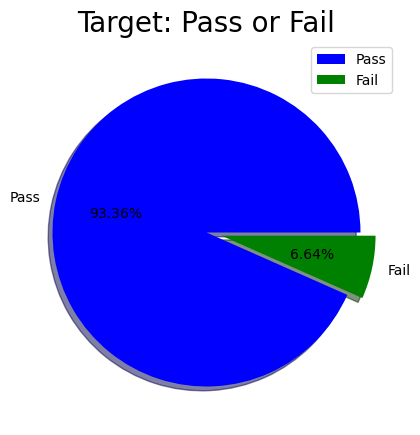

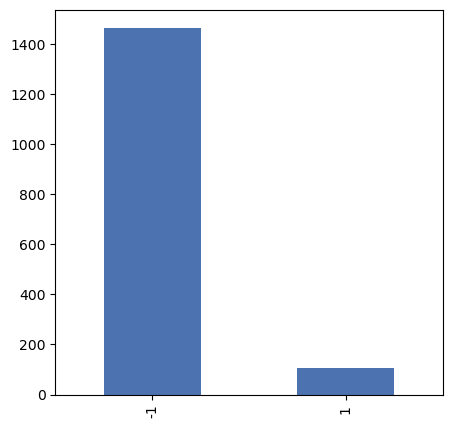

In [40]:
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(df_signal_data['Pass/Fail'].value_counts(), labels = ['Pass', 'Fail'], colors = ['blue', 'green'], explode = [0, 0.1], autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
df_signal_data['Pass/Fail'].value_counts().plot(kind="bar");

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_10760\1586070570.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_signal_data.corr(), cmap = "YlGnBu")


Text(0.5, 1.0, 'Correlation heatmap for the Data')

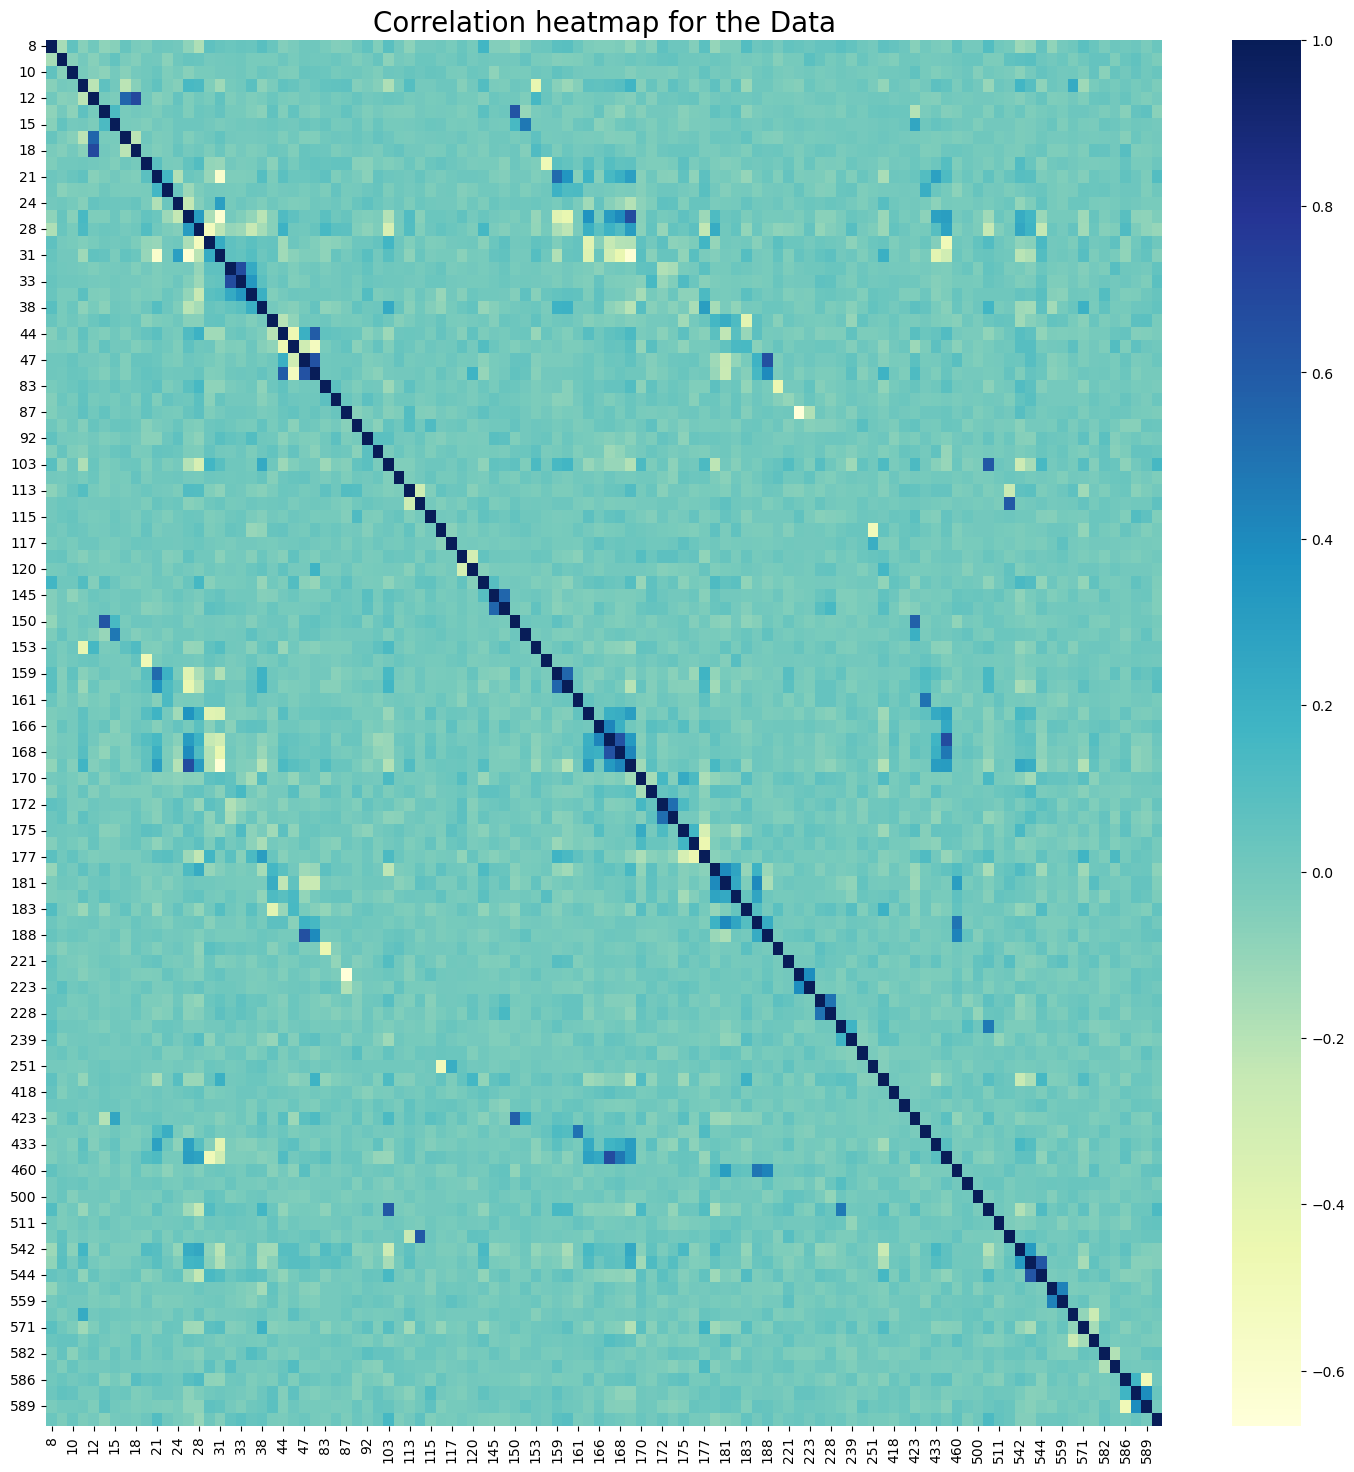

In [41]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df_signal_data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

-----------------------------------------------------------------------------------------------------------------------------

4. Data pre-processing: [10 Marks]
    
A. Segregate predictors vs target attributes. [2 Marks]

In [42]:
# Deleting the first column 

df_signal_data = df_signal_data.drop(columns='Time')
df_signal_data.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [43]:
# separating the dependent and independent data

x = df_signal_data.iloc[:, :106]
y = df_signal_data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 106)
shape of y: (1567,)


In [44]:
# splitting them into train test and split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 106)
shape of x_test:  (471, 106)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [45]:
print("{0:0.2f}% data is in training set".format((len(x_train) / len(df_signal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test) / len(df_signal_data.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [46]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Fail    : 72 (6.57%)
Training Pass  : 0 (0.00%)

Test Fail        : 32 (6.79%)
Test Pass       : 0 (0.00%)



In [47]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predicted_labels = logisticRegression.predict(x_test)

print('Accuracy on Training data: ', logisticRegression.score(x_train, y_train))
print('Accuracy on Test data: ', logisticRegression.score(x_test, y_test))

Accuracy on Training data:  0.9324817518248175
Accuracy on Test data:  0.9299363057324841


In [49]:
confusion_matrix(y_test, predicted_labels)

array([[438,   1],
       [ 32,   0]], dtype=int64)

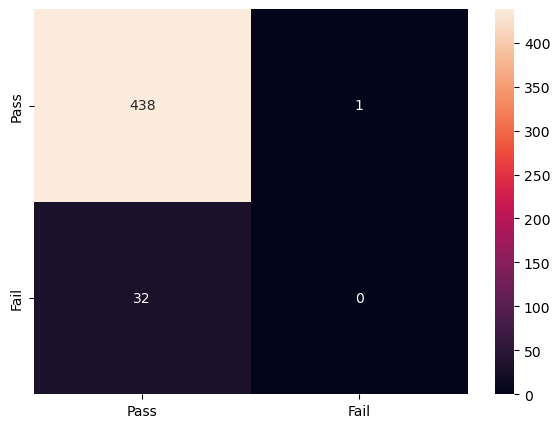

In [50]:
# calculate accuracy measures and confusion matrix

cm = confusion_matrix(y_test, predicted_labels)
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]], columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7, 5))
sns.heatmap(df_cm, annot = True, fmt = 'g')
plt.show()

In [51]:
classification_report(y_test, predicted_labels)

'              precision    recall  f1-score   support\n\n          -1       0.93      1.00      0.96       439\n           1       0.00      0.00      0.00        32\n\n    accuracy                           0.93       471\n   macro avg       0.47      0.50      0.48       471\nweighted avg       0.87      0.93      0.90       471\n'

-----------------------------------------------------------------------------------------------------------------------------

B. Check for target balancing and fix it if found imbalanced. [3 Marks]

D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [52]:
# # Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

# seed = 3

# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
# models.append(('GNB', GaussianNB()))
# #models.append(("SVM", SVC(kernel='linear', C=1, gamma=.6)))
# models.append(("DT", DecisionTreeClassifier()))
# models.append(("RF", RandomForestClassifier()))
# models.append(("AB", AdaBoostClassifier()))
# models.append(("GBT", GradientBoostingClassifier()))
# #models.append(("XGB", XGBClassifier(verbosity=0)))
# #models.append(("LightGBM",LGBMClassifier()))

# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'

# for name, model in models:
#     kfold = model_selection.KFold(n_splits = 5, random_state = seed, shuffle = True)
#     cv_results = model_selection.cross_val_score(model, x, y, cv = kfold, scoring = scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean() * 100, cv_results.std() * 100)
#     print(msg)

In [53]:
# Implementing random under sampling

randomUnderSampler = RandomUnderSampler(sampling_strategy = 0.5)
x_under, y_under= randomUnderSampler.fit_resample(x_train, y_train)

In [54]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))

Under Training Fail    : 72 (33.33%)
under Training Pass  : 0 (0.00%)


In [55]:
# Implementing SMOTE

smote = SMOTE(sampling_strategy = 0.5)
x_SMOTE, y_SMOTE = smote.fit_resample(x_train, y_train)

In [56]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 512 (33.33%)
SMOTE Training Pass  : 0 (0.00%)


In [57]:
# Implementing random over sampling

randomOverSampler = RandomOverSampler(sampling_strategy = 0.5)
x_over, y_over = randomOverSampler.fit_resample(x_train, y_train)

In [58]:
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))

over Training Fail    : 512 (33.33%)
over Training Pass  : 0 (0.00%)


In [59]:
# Implementing ADASYN sampling

adasyn = ADASYN(sampling_strategy=0.5)
x_adasyn, y_adasyn = adasyn.fit_resample(x_train, y_train)

In [60]:
print("ADASYN Training Fail    : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 1]), (len(y_adasyn[y_adasyn[:] == 1])/len(y_adasyn)) * 100))
print("ADASYN Training Pass  : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 0]), (len(y_adasyn[y_adasyn[:] == 0])/len(y_adasyn)) * 100))

ADASYN Training Fail    : 527 (33.98%)
ADASYN Training Pass  : 0 (0.00%)


In [61]:
# # Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

# seed = 3

# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
# models.append(('GNB', GaussianNB()))
# models.append(("SVM", SVC(kernel='linear', C=1, gamma=.6)))
# models.append(("DT", DecisionTreeClassifier()))
# models.append(("RF", RandomForestClassifier()))
# models.append(("AB", AdaBoostClassifier()))
# models.append(("GBT", GradientBoostingClassifier()))
# #models.append(("XGB", XGBClassifier(verbosity=0)))
# #models.append(("LightGBM",LGBMClassifier()))

# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'

# for name, model in models:
#     kfold = model_selection.KFold(n_splits = 5, random_state = seed, shuffle = True)
#     cv_results = model_selection.cross_val_score(model, x, y, cv = kfold, scoring = scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean() * 100, cv_results.std() * 100)
#     print(msg)

-----------------------------------------------------------------------------------------------------------------------------

C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [62]:
x.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [63]:
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [64]:
print("{0:0.2f}% data is in training set".format((len(x_train) / len(df_signal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test) / len(df_signal_data.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [65]:
# Standardize the data training data

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [66]:
# Standardize the data test data

scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [67]:
model = SVC()
model.fit(x_train_scaled, y_train)
prediction = model.predict(x_test_scaled)

In [68]:
# Check the accuracy on the training data
print('Accuracy on Training data: ', model.score(x_train, y_train))

# Check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(x_test, y_test))

# Calculate the recall value 
print('Recall value: ', metrics.recall_score(y_test, prediction, average = 'macro'))

# Calculate the precision value 
print('Precision value: ', metrics.precision_score(y_test, prediction, average = 'macro'))

C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy on Training data:  0.9315693430656934
Accuracy on Testing data:  0.9384288747346072
Recall value:  0.9137931034482758
Precision value:  0.9944071588366891


In [69]:
print("Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))

Confusion Matrix:
 [[442   5]
 [  0  24]]


In [70]:
print("Classification Report:\n", metrics.classification_report(prediction, y_test))

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       447
           1       0.83      1.00      0.91        24

    accuracy                           0.99       471
   macro avg       0.91      0.99      0.95       471
weighted avg       0.99      0.99      0.99       471



-----------------------------------------------------------------------------------------------------------------------------

5. Model training, testing and tuning: [20 Marks]
    
A. Use any Supervised Learning technique to train a model. [2 Marks]

In [71]:
x.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [72]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

x_Scaled = x.apply(zscore)  # convert all attributes to Z scale
x_Scaled.describe().T

count          mean       std        min       25%       50%  \
8          1567.0  3.137815e-15  1.000319  -3.682475 -0.699101 -0.017090   
9          1567.0  9.068829e-18  1.000319  -3.480332 -0.659460 -0.030392   
10         1567.0  0.000000e+00  1.000319  -3.771119 -0.618275  0.027359   
11         1567.0 -3.827046e-15  1.000319 -24.835180 -0.502630  0.116335   
12         1567.0  1.242430e-14  1.000319  -5.489229 -0.561085 -0.128976   
...           ...           ...       ...        ...       ...       ...   
583        1567.0 -5.668018e-18  1.000319  -0.542709 -0.216539 -0.088401   
586        1567.0  1.360324e-16  1.000319  -3.105874 -0.648441 -0.077604   
587        1567.0  9.068829e-18  1.000319  -1.508184 -0.667458 -0.190289   
589        1567.0  1.768422e-16  1.000319  -1.062218 -0.589367 -0.294644   
Pass/Fail  1567.0 -4.534414e-18  1.000319  -0.266621 -0.266621 -0.266621   

                75%        max  
8          0.731294   2.621555  
9          0.611919   5.015393  
10         0.619189   5.687413  
11         0.558453   1.643651  
12         0.629945  22.152683  
...             ...        ...  
583        0.068860  26.867231  
586        0.497282   6.586209  
587        0.434576   7.205831  
589        0.160709   6.795495  
Pass/Fail -0.266621   3.750641  

[106 rows x 8 columns]

In [73]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [74]:
print("{0:0.2f}% data is in training set".format((len(x_train) / len(df_signal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test) / len(df_signal_data.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [75]:
KNN = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [76]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN.predict(x_test)

print('Accuracy on Training data: ', KNN.score(x_train, y_train))
print('Accuracy on Test data: ', KNN.score(x_test, y_test))

Accuracy on Training data:  0.9361313868613139
Accuracy on Test data:  0.9320594479830149


In [77]:
confusion_matrix(y_test, predicted_labels)

array([[438,   1],
       [ 31,   1]], dtype=int64)

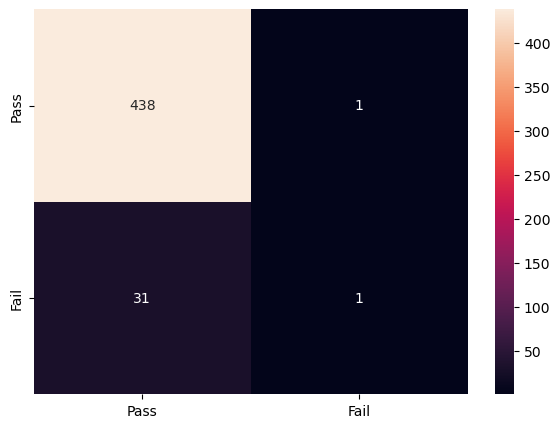

In [78]:
# calculate accuracy measures and confusion matrix

cm = confusion_matrix(y_test, predicted_labels)
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass", "Fail"]], columns = [i for i in ["Pass", "Fail"]])
plt.figure(figsize = (7, 5))
sns.heatmap(df_cm, annot = True, fmt = 'g')
plt.show()

In [79]:
classification_report(y_test, predicted_labels)

'              precision    recall  f1-score   support\n\n          -1       0.93      1.00      0.96       439\n           1       0.50      0.03      0.06        32\n\n    accuracy                           0.93       471\n   macro avg       0.72      0.51      0.51       471\nweighted avg       0.90      0.93      0.90       471\n'

-----------------------------------------------------------------------------------------------------------------------------

B. Use cross validation techniques. [3 Marks]

Hint: Use all CV techniques that you have learnt in the course.

In [80]:
x.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [82]:
# Implementing K-fold cross-validation

num_folds = 50
seed = 7

kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)

C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [83]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 93.216% (5.051%)


In [84]:
print("Cross Validation score: {}".format(results))

Cross Validation score: [1.         0.9375     0.9375     0.96875    0.96875    0.90625
 0.9375     0.96875    0.96875    1.         0.9375     0.875
 1.         0.9375     0.875      1.         0.9375     0.93548387
 0.87096774 0.90322581 0.87096774 0.93548387 0.93548387 0.93548387
 0.93548387 1.         1.         0.90322581 0.93548387 0.93548387
 0.87096774 0.87096774 0.93548387 0.87096774 0.90322581 0.77419355
 0.87096774 0.96774194 0.90322581 1.         0.96774194 0.90322581
 0.96774194 0.93548387 0.83870968 0.90322581 0.87096774 1.
 1.         1.        ]


In [85]:
print("Average Cross Validation score: {}".format(results.mean()))

Average Cross Validation score: 0.9321572580645161


In [86]:
# Implementing Stratified k-fold cross-validation

num_folds = 3
seed = 7

stratifiedKFold = StratifiedKFold(n_splits = num_folds, random_state = seed, shuffle = True)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = stratifiedKFold)

C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [87]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 93.172% (0.087%)


In [88]:
print("Cross Validation score: {}".format(results))

Cross Validation score: [0.93116635 0.93295019 0.93103448]


In [89]:
print("Average Cross Validation score: {}".format(results.mean()))

Average Cross Validation score: 0.9317170074406178


In [90]:
# Implementing Leave-p-out cross-validation

num_folds = 5

leavePOut = LeavePOut(p = 1)
leavePOut.get_n_splits(x)
model = RandomForestClassifier(n_estimators = num_folds, max_depth = 3, n_jobs = -1)
results = cross_val_score(model, x, y, cv = leavePOut)

In [91]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 94.065% (23.628%)


In [92]:
print("Cross Validation score: {}".format(results))

Cross Validation score: [1. 1. 1. ... 1. 1. 1.]


In [93]:
print("Average Cross Validation score: {}".format(results.mean()))

Average Cross Validation score: 0.9406509253350351


In [94]:
# Implementing Leave-one-out cross-validation

num_folds = 7

leaveOneOut = LeaveOneOut()
leavePOut.get_n_splits(x)
model = RandomForestClassifier(n_estimators = num_folds, max_depth = 4, n_jobs = -1)
results = cross_val_score(model, x, y, cv = leaveOneOut)

In [95]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 94.193% (23.388%)


In [96]:
print("Cross Validation score: {}".format(results))

Cross Validation score: [1. 1. 0. ... 1. 1. 1.]


In [97]:
print("Average Cross Validation score: {}".format(results.mean()))

Average Cross Validation score: 0.9419272495213784


In [98]:
# Implementing ShuffleSplit cross-validation

num_folds = 6

shuffleSplit = ShuffleSplit(n_splits = num_folds, test_size = 0.3, train_size = 0.5)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = shuffleSplit)

C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [99]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 93.489% (1.121%)


In [100]:
print("Cross Validation score: {}".format(results))

Cross Validation score: [0.92356688 0.92356688 0.95116773 0.94904459 0.92993631 0.93205945]


In [101]:
print("Average Cross Validation score: {}".format(results.mean()))

Average Cross Validation score: 0.9348903043170559


-----------------------------------------------------------------------------------------------------------------------------

C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]

Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

In [102]:
x.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 7)

In [104]:
print("{0:0.2f}% data is in training set".format((len(x_train) / len(df_signal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test) / len(df_signal_data.index)) * 100))

74.98% data is in training set
25.02% data is in test set


In [105]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [106]:
param_grid = {'n_neighbors': list(range(1, 9)), 'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute')}
gs = GridSearchCV(knn_clf, param_grid, cv = 10)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [107]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 6}

In [108]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [109]:
gs.cv_results_['mean_test_score']

array([0.88174707, 0.92937853, 0.92088223, 0.9327756 , 0.9319209 ,
       0.93362306, 0.93362306, 0.93362306, 0.88174707, 0.92937853,
       0.92088223, 0.9327756 , 0.9319209 , 0.93362306, 0.93362306,
       0.93362306, 0.88174707, 0.92937853, 0.92088223, 0.9327756 ,
       0.9319209 , 0.93362306, 0.93362306, 0.93362306, 0.88174707,
       0.92937853, 0.92088223, 0.9327756 , 0.9319209 , 0.93362306,
       0.93362306, 0.93362306])

-----------------------------------------------------------------------------------------------------------------------------

D. Use any other technique/method which can enhance the model performance. [4 Marks]

Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [110]:
x.head()

8       9      10      11        12       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387   

         18      20  ...     559       570     571    572     582     583  \
0  192.3963  1.4026  ...  0.4385  533.8500  2.1113   8.95  0.5005  0.0118   
1  191.2872  1.3825  ...  0.1745  535.0164  2.4335   5.92  0.5019  0.0223   
2  192.7035  1.4123  ...  0.3718  535.0245  2.0293  11.21  0.4958  0.0157   
3  192.1557  1.4011  ...  0.7288  530.5682  2.0253   9.33  0.4990  0.0103   
4  191.6037  1.3888  ...  0.2156  532.0155  2.0275   8.83  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.058400  0.048400   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 106 columns]

In [111]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [112]:
print("{0:0.2f}% data is in training set".format((len(x_train) / len(df_signal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test) / len(df_signal_data.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [113]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 2)), ('clf', LogisticRegression(random_state = 1))]) 
pipe_lr.fit(x_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.932


In [114]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 

param_grid = {'pca__n_components': [14, 15], 'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel': ['rbf','poly']} 

grid = GridSearchCV(pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit(x_train, y_train)

print("Best cross-validation accuracy: {:.2f}". format(grid.best_score_)) 
print("Best parameters: ", grid.best_params_) 
print("Test set accuracy: {:.2f}". format(grid.score(x_test, y_test)))


Best cross-validation accuracy: 0.93
Best parameters:  {'pca__n_components': 14, 'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}
Test set accuracy: 0.93


In [115]:
grid.predict(x_test)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [116]:
# build a classifier
clf = RandomForestClassifier(n_estimators = 50)

In [117]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [118]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = samples) # default cv = 3
randomCV.fit(x, y)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E2F8C660B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E2F8B33BE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E2F8B309A0>})

In [119]:
randomCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [120]:
randomCV.cv_results_['mean_test_score']

array([0.93554262, 0.93554262, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93617956])

In [121]:
randomCV.best_estimator_

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [122]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [123]:
# run grid search
grid_search = GridSearchCV(clf, param_grid = param_grid)
grid_search.fit(x, y)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [124]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [125]:
grid_search.cv_results_['mean_test_score']

array([0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93936631, 0.93554262,
       0.93363179, 0.93554262, 0.93872734, 0.93363179, 0.93363179,
       0.93617956, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93617956, 0.93872734, 0.93809039, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       1.        , 1.        , 1.        , 1.        , 0.99936102,
       0.99872204, 0.94828962, 0.95087605, 0.94767099, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93554262, 0.93490

In [126]:
grid_search.best_estimator_

RandomForestClassifier(max_features=10, n_estimators=50)

In [127]:
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [128]:
# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# apply standardization on numerical features
for i in df_signal_data.select_dtypes([np.number]).columns:
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])


In [129]:
# Comparing Unscaled, Normalized, and Standardized Data
 
knn = KNeighborsRegressor(n_neighbors = 7)

rmse = []

# raw, normalized and standardized training and testing data
trainx = [x_train, x_train_norm, x_train_stand]
testx = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainx)):
    knn.fit(trainx[i], y_train)
    pred = knn.predict(testx[i])
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE': rmse}, index = ['Original','Normalized','Standardized'])
df_knn

RMSE
Original      0.523630
Normalized    0.146599
Standardized  0.366971

In [130]:
# Comparing Unscaled, Normalized, and Standardized Data

svr = SVR(kernel = 'rbf', C = 5)

rmse = []

# raw, normalized and standardized training and testing data
trainx = [x_train, x_train_norm, x_train_stand]
testx = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainx)):
    svr.fit(trainx[i], y_train)
    pred = svr.predict(testx[i])
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE': rmse}, index = ['Original','Normalized','Standardized'])
df_svr

RMSE
Original      0.504901
Normalized    0.082879
Standardized  0.198274

In [131]:
# Comparing Unscaled, Normalized, and Standardized Data

dt = DecisionTreeRegressor(max_depth = 10, random_state = 27)

rmse = []

# raw, normalized and standardized training and testing data
trainx = [x_train, x_train_norm, x_train_stand]
testx = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainx)):
    dt.fit(trainx[i], y_train)
    pred = dt.predict(testx[i])
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE': rmse}, index = ['Original','Normalized','Standardized'])
df_dt

RMSE
Original       0.0
Normalized     0.0
Standardized   0.0

In [132]:
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 7)

In [133]:
# it takes a list of tuples as parameter. The last entry is the call to the modelling algorithm
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [134]:
# use the pipeline object as you would a regular classifier
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [135]:
y_predict = pipeline.predict(x_test)
model_score = pipeline.score(x_test, y_test)

In [136]:
print(model_score)

1.0


In [137]:
print(metrics.confusion_matrix(y_test, y_predict))

[[448   0]
 [  0  23]]


-----------------------------------------------------------------------------------------------------------------------------

E. Display and explain the classification report in detail. [3 Marks]

In [138]:
# Gaussian Naive Bayes on Normal Dataset

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [139]:
modelnb_score = nb.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modelnb_score)

Accuracy Score of Training Data:  0.9936131386861314


In [140]:
y_predictnb= nb.predict(x_test)
modelnb_score = accuracy_score(y_test, y_predictnb)
print('Accuracy Score of Test Data:', modelnb_score)

Accuracy Score of Test Data: 0.9893842887473461


In [141]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnb, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        23
           0       0.00      0.00      0.00         0

   micro avg       0.82      1.00      0.90        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.82      1.00      0.90        23



C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anac

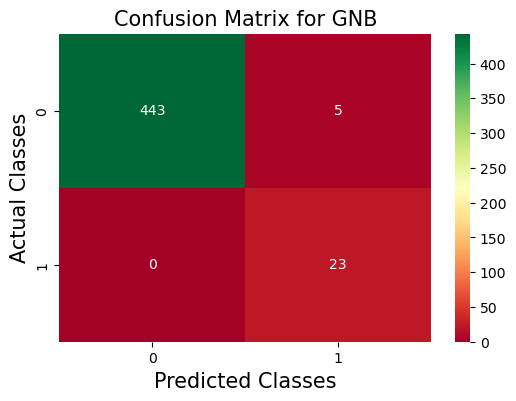

In [142]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

In [143]:
precision_nb, recall_nb, f1_score_nb, support = precision_recall_fscore_support(y_test, y_predictnb, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nb)
print('Recall Score :', '%0.2f' % recall_nb)
print('F1-Score:', '%0.2f' % f1_score_nb)
nb_acc= accuracy_score(y_test, y_predictnb)
print('Accuracy Score :','%0.2f' % nb_acc)
print('Thresholdnb :','%0.2f' % 0.016)
Thresholdnb=0.016

Precision Score : 0.91
Recall Score : 0.99
F1-Score: 0.95
Accuracy Score : 0.99
Thresholdnb : 0.02


In [144]:
# Gaussian Naive Bayes on Under sampled Data

nbu = GaussianNB()
nbu.fit(x_under, y_under)

GaussianNB()

In [145]:
modelnbu_score = nbu.score(x_under,y_under)
print('Accuracy Score of Training Data: ', modelnbu_score)

Accuracy Score of Training Data:  1.0


In [146]:
y_predictnbu= nbu.predict(x_test)
modelnbu_score = accuracy_score(y_test, y_predictnbu)
print('Accuracy Score of Test Data:', modelnbu_score)

Accuracy Score of Test Data: 0.9766454352441614


In [147]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnbu, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        23
           0       0.00      0.00      0.00         0

   micro avg       0.68      1.00      0.81        23
   macro avg       0.34      0.50      0.40        23
weighted avg       0.68      1.00      0.81        23



C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anac

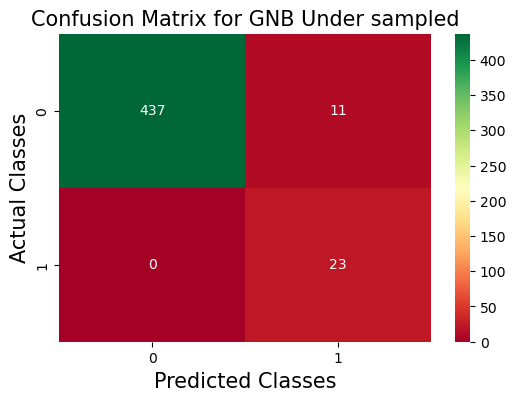

In [148]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

In [149]:
precision_nbu, recall_nbu, f1_score_nbu, support = precision_recall_fscore_support(y_test, y_predictnbu, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nbu)
print('Recall Score :', '%0.2f' % recall_nbu)
print('F1-Score:', '%0.2f' % f1_score_nbu)
nbu_acc= accuracy_score(y_test, y_predictnbu)
print('Accuracy Score :','%0.2f' % nbu_acc)
print('Thresholdnbu:','%0.2f' % 0.4753)
Thresholdnbu=0.4753

Precision Score : 0.84
Recall Score : 0.99
F1-Score: 0.90
Accuracy Score : 0.98
Thresholdnbu: 0.48


In [150]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
random_grid = {'n_estimators': n_estimators, 'criterion':['gini','entropy']}

In [151]:
# RandomForest on Random over sampled Dataset

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(x_over, y_over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=90, verbose=2)

In [152]:
modelrfg1_score=rf_random.score(x_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  1.0


In [153]:
y_predictrfg1= rf_random.predict(x_test)
modelrfg1_score = accuracy_score(y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.9957537154989384


In [154]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictrfg1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        23
           0       0.00      0.00      0.00         0

   micro avg       1.00      0.91      0.95        23
   macro avg       0.50      0.46      0.48        23
weighted avg       1.00      0.91      0.95        23



C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya Govindrao\anac

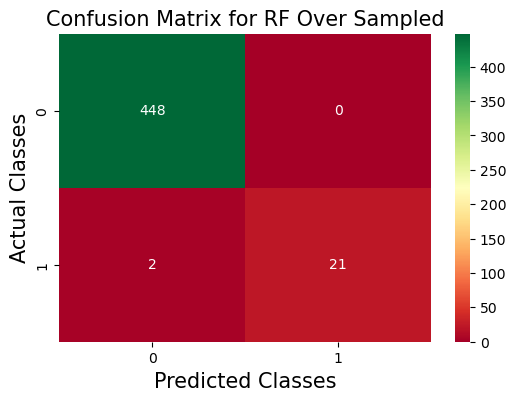

In [155]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);

In [156]:
precision_rfo, recall_rfo, f1_score_rfo, support = precision_recall_fscore_support(y_test, y_predictrfg1, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rfo)
print('Recall Score :', '%0.2f' % recall_rfo)
print('F1-Score:', '%0.2f' % f1_score_rfo)
rfo_acc= accuracy_score(y_test, y_predictrfg1)
print('Accuracy Score :','%0.2f' % rfo_acc)
print('Thresholdrf :','%0.2f' % 0.1688)
Thresholdrf=0.1688

Precision Score : 1.00
Recall Score : 0.96
F1-Score: 0.98
Accuracy Score : 1.00
Thresholdrf : 0.17


-----------------------------------------------------------------------------------------------------------------------------

F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

In [157]:
lrcl = LogisticRegression()
nbcl = GaussianNB()
dtcl = DecisionTreeClassifier()
lr = LinearRegression()
knncl = KNeighborsClassifier()
svcl= SVC()
svr = SVR()
rfcl = RandomForestClassifier()
bgcl = BaggingClassifier()
nncl = MLPClassifier()

In [158]:
for clf, label in zip([lrcl , nbcl, dtcl, lr, knncl, svcl, svr,  rfcl, bgcl, nncl], 
    ['lrcl' , 'nbcl', 'dtcl', 'lr', 'knncl', 'svcl', 'svr',  'rfcl',  'bgcl', 'nncl']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params())

model name:  lrcl

 model_hyperparameters 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
model name:  nbcl

 model_hyperparameters 
 {'priors': None, 'var_smoothing': 1e-09}
model name:  dtcl

 model_hyperparameters 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
model name:  lr

 model_hyperparameters 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
model name:  knncl

 model_hyperparameters 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neigh

-----------------------------------------------------------------------------------------------------------------------------

6. Post Training and Conclusion: [5 Marks]
    
A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

In [159]:
modellists = []
modellists.append(['Gaussian NB Normal Data', nb_acc * 100, recall_nb * 100, precision_nb * 100,f1_score_nb*100,Thresholdnb])
modellists.append(['Gausian NB under samples data', nbu_acc* 100, recall_nbu * 100, precision_nbu* 100,f1_score_nbu*100,Thresholdnbu])
modellists.append(['Random Forest Over sampled Data', rfo_acc * 100, recall_rfo * 100, precision_rfo * 100,f1_score_rfo*100,Thresholdrf])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','F1 Score','Threshold'])
model_df

Model  Accuracy Scores on Test  Recall Score  \
0          Gaussian NB Normal Data                98.938429     99.441964   
1    Gausian NB under samples data                97.664544     98.772321   
2  Random Forest Over sampled Data                99.575372     95.652174   

   Precision Score   F1 Score  Threshold  
0        91.071429  94.817456     0.0160  
1        83.823529  89.729408     0.4753  
2        99.777778  97.615914     0.1688

-----------------------------------------------------------------------------------------------------------------------------

C. Pickle the selected model for future use. [2 Marks]

In [160]:
import pickle

regressor = LinearRegression()
#Fitting model with training data
regressor.fit(x, y)

LinearRegression()

In [161]:
pickle.dump(regressor, open('model.pkl','wb'))

In [162]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [163]:
model

LinearRegression()

-----------------------------------------------------------------------------------------------------------------------------

D. Write your conclusion on the results. [1 Marks]

-----------------------------------------------------------------------------------------------------------------------------